In [1]:
import numpy as np
import re
import os
import sys
import time
from collections import defaultdict
from string import digits
from gensim import corpora, models, similarities, matutils
import networkx as nx
import string

import csv
import matplotlib.pyplot as plt
from sklearn import manifold

from sklearn.cluster import KMeans


C:\Users\Burki\Anaconda3\envs\py34\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


In [2]:
# loads data
dictionary = corpora.Dictionary.load('database/TRTWORLD_Followers_5-7(10).dict')
corpus = corpora.MmCorpus('database/TRTWORLD_Followers_5-7(10).mm')
lda = models.LdaModel.load("database/TRTWORLD_Followers_5-7_25-20-0001(10).lda")

In [3]:
index = similarities.MatrixSimilarity(lda[corpus])
index.save("simIndex(10).index")

In [4]:
similarityMatrix = []

for i in range(len(corpus)):
    vec_lda = lda[corpus[i]]
    sims = index[vec_lda]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    similarityMatrix.append(sims)
    
# vec_lda = lda[corpus[557]]

print(similarityMatrix[0])

[(0, 1.0), (374, 1.0), (486, 1.0), (213, 0.98854947), (614, 0.80187845), (449, 0.5713383), (598, 0.42117563), (209, 0.35334525), (457, 0.12288124), (235, 0.073292568), (153, 0.069495343), (254, 0.061994117), (390, 0.044922471), (197, 0.043093603), (166, 0.041533951), (157, 0.030742604), (552, 0.024230776), (286, 0.022604397), (98, 0.02016123), (38, 0.019891698), (441, 0.017069085), (68, 0.01202683), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (

In [5]:
distanceMatrix = np.zeros((len(corpus), len(corpus)))

for i in range(len(corpus)):
    for tuples in similarityMatrix[i]:
        print(tuples)
        break

(0, 1.0)
(1, 0.99999994)
(2, 0.99999994)
(3, 1.0)
(4, 1.0)
(5, 0.99999976)
(6, 0.99999976)
(7, 0.99999911)
(8, 0.99999869)
(9, 1.0)
(10, 0.99999893)
(11, 0.99999988)
(12, 0.99999988)
(13, 0.99999994)
(14, 1.0)
(15, 1.0)
(16, 0.99999976)
(17, 1.0)
(18, 1.0)
(19, 1.0)
(20, 0.9999994)
(21, 1.0)
(22, 0.99999845)
(23, 0.99999988)
(24, 1.0)
(25, 1.0)
(26, 1.0)
(27, 0.99999595)
(28, 1.0)
(29, 0.99985194)
(30, 1.0)
(31, 1.0)
(32, 0.99985796)
(33, 0.99999779)
(34, 0.99999994)
(35, 1.0)
(36, 0.99999928)
(37, 0.99999911)
(38, 0.99999976)
(39, 1.0)
(40, 1.0)
(41, 1.0)
(42, 1.0)
(43, 1.0)
(44, 0.99999905)
(45, 0.99999988)
(46, 1.0)
(47, 0.99999994)
(48, 1.0)
(49, 0.99999124)
(50, 1.0)
(51, 1.0)
(52, 1.0)
(53, 1.0)
(54, 1.0)
(55, 1.0)
(56, 1.0)
(57, 0.99999982)
(58, 0.99999982)
(59, 0.99999994)
(60, 1.0)
(61, 0.99999952)
(62, 0.99998927)
(63, 0.99998605)
(64, 1.0)
(65, 1.0)
(66, 1.0)
(67, 0.99999893)
(68, 0.99999994)
(69, 1.0)
(70, 1.0)
(71, 1.0)
(72, 1.0)
(73, 1.0)
(74, 0.9999997)
(75, 0.9999997)
(

In [6]:
dt = [('len', float)]

distanceMatrix = np.zeros((len(corpus), len(corpus)))

for i in range(len(corpus)):
    for j in range(i,len(similarityMatrix[i])):
        if i == similarityMatrix[i][j][0]:
            distanceMatrix[i][similarityMatrix[i][j][0]] = 0
        else:
            distanceMatrix[i][similarityMatrix[i][j][0]] = (1-similarityMatrix[i][j][1])*100
            distanceMatrix[similarityMatrix[i][j][0]][i] = (1-similarityMatrix[i][j][1])*100

100.0


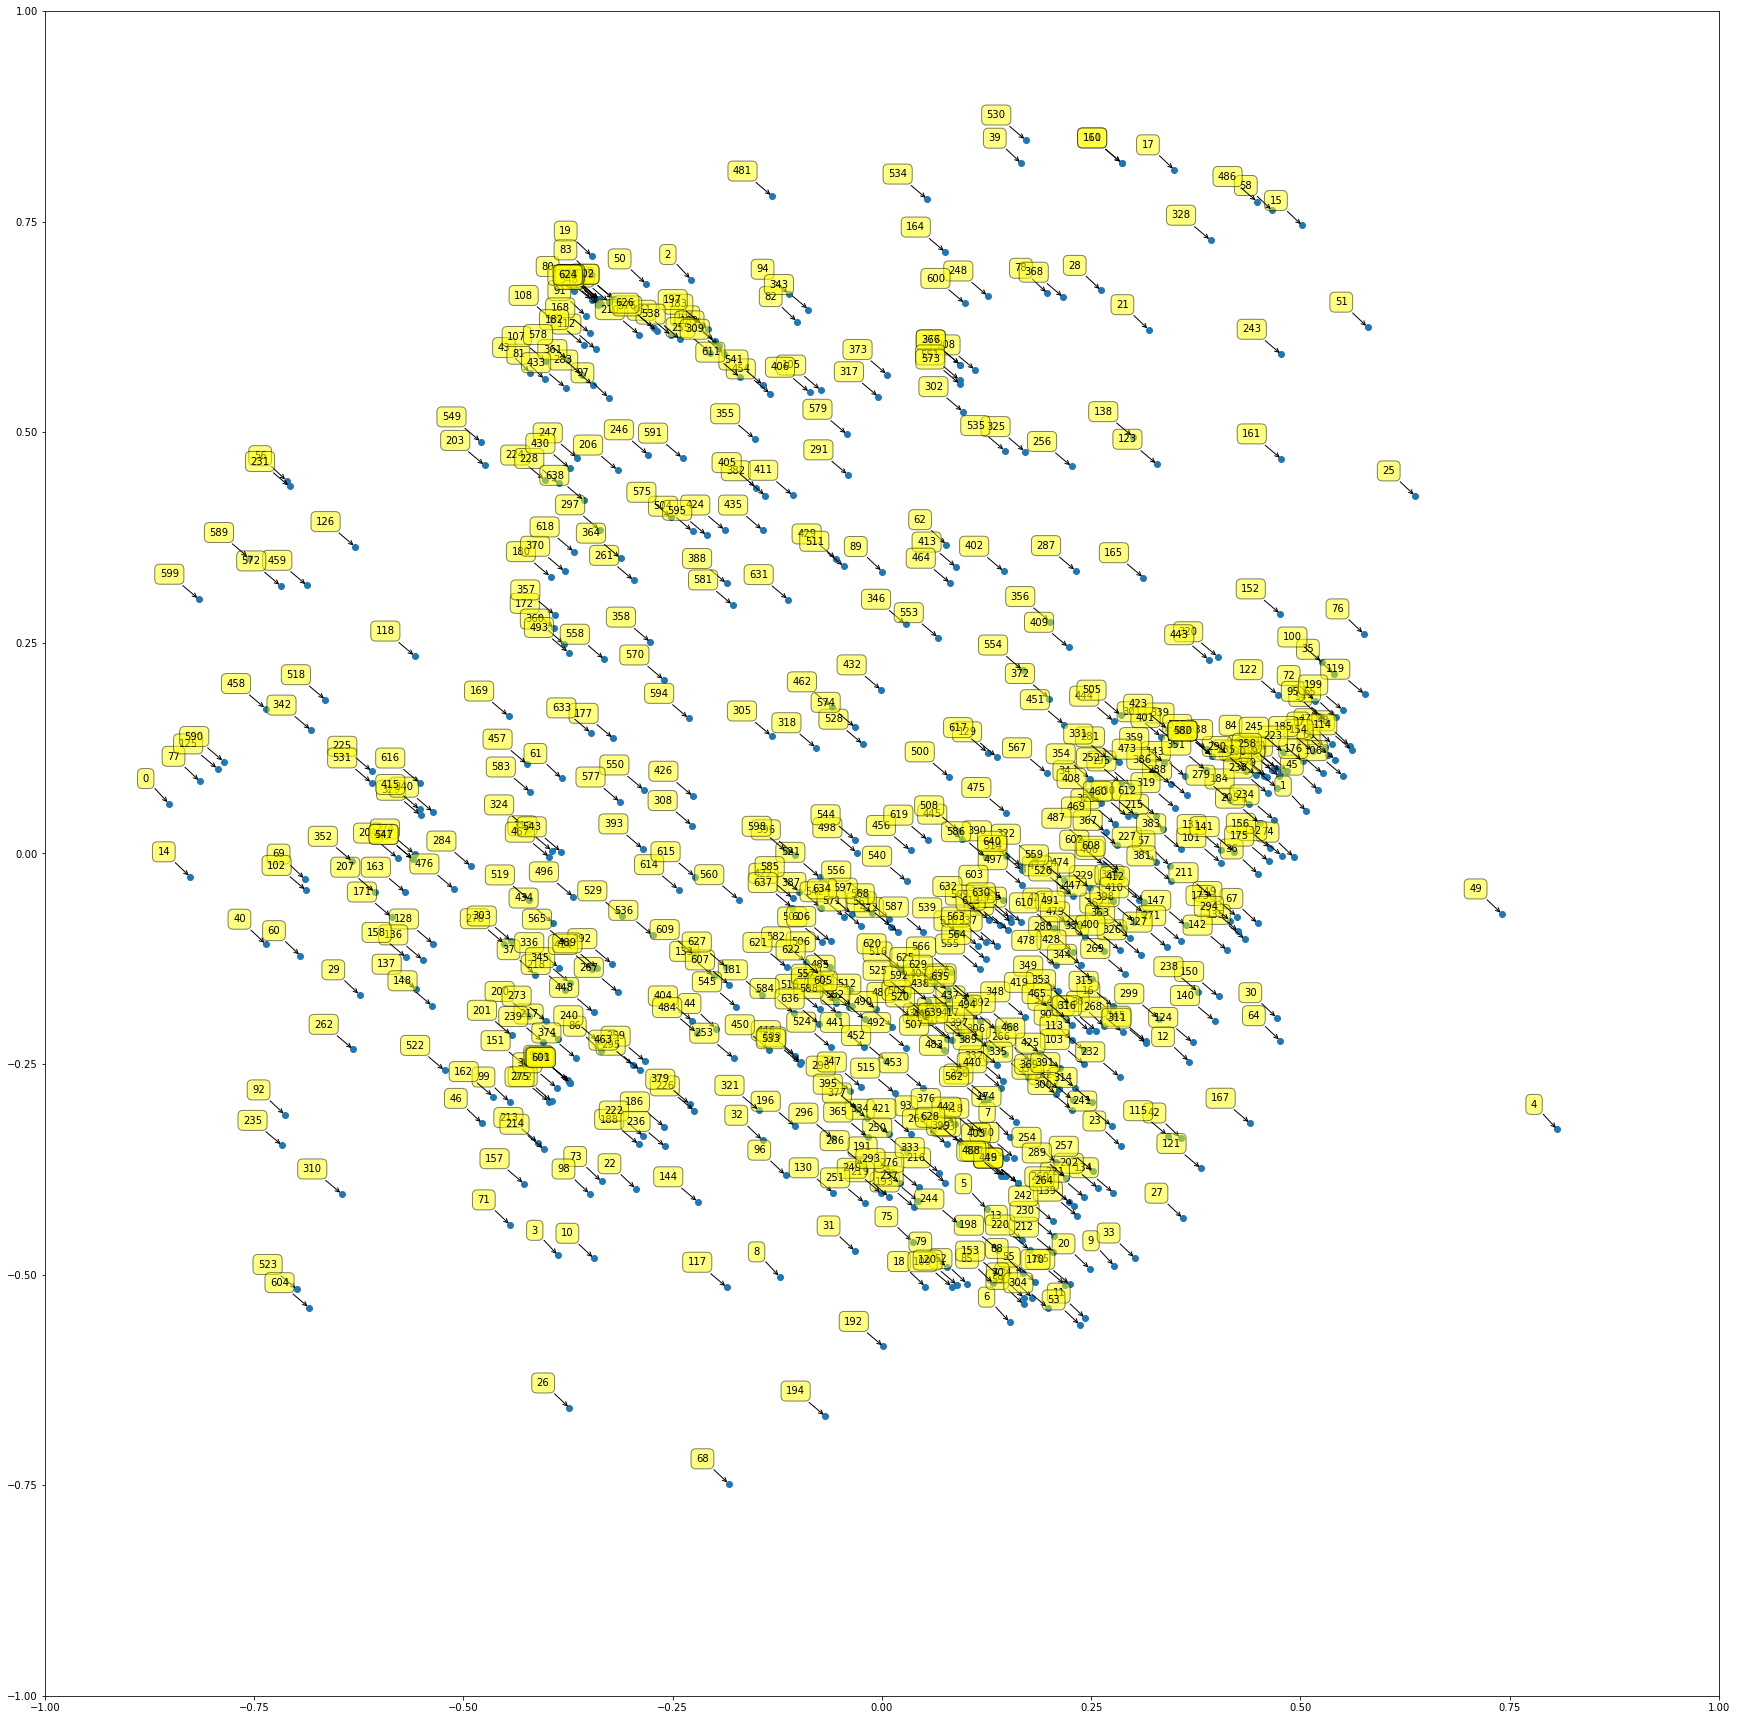

In [8]:
# loads data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(11).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(11).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_15-20-0001(11).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

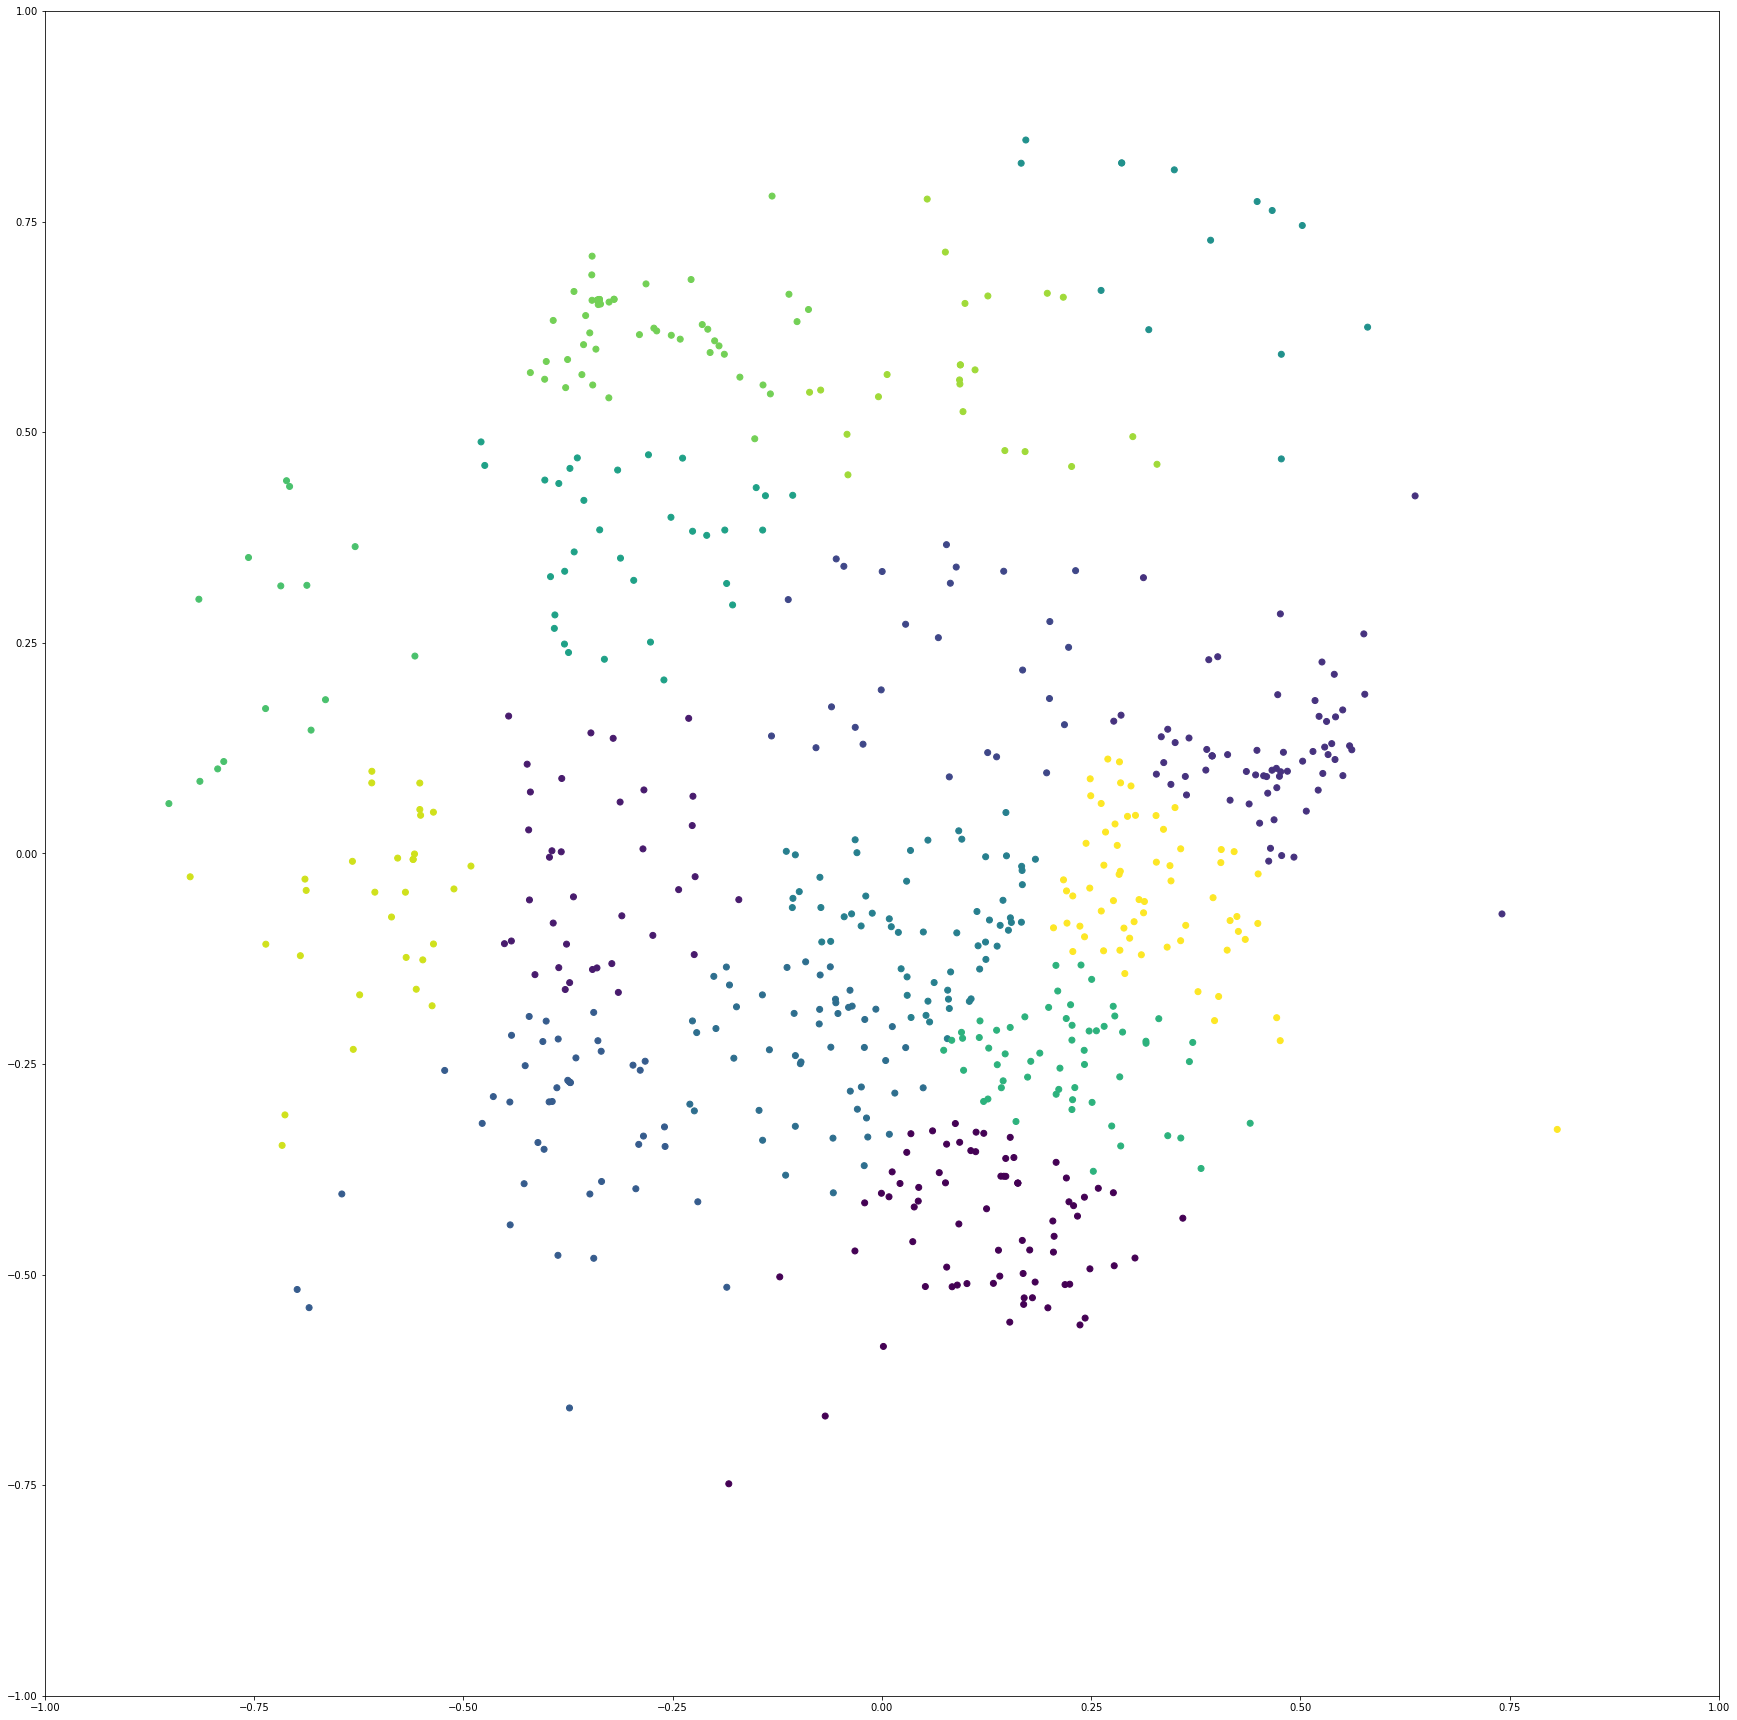

In [9]:
kmeansList = np.asarray(coords)
kmeans = KMeans(n_clusters=15, random_state=0).fit(kmeansList)

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c = kmeans.labels_
    )

plt.show()

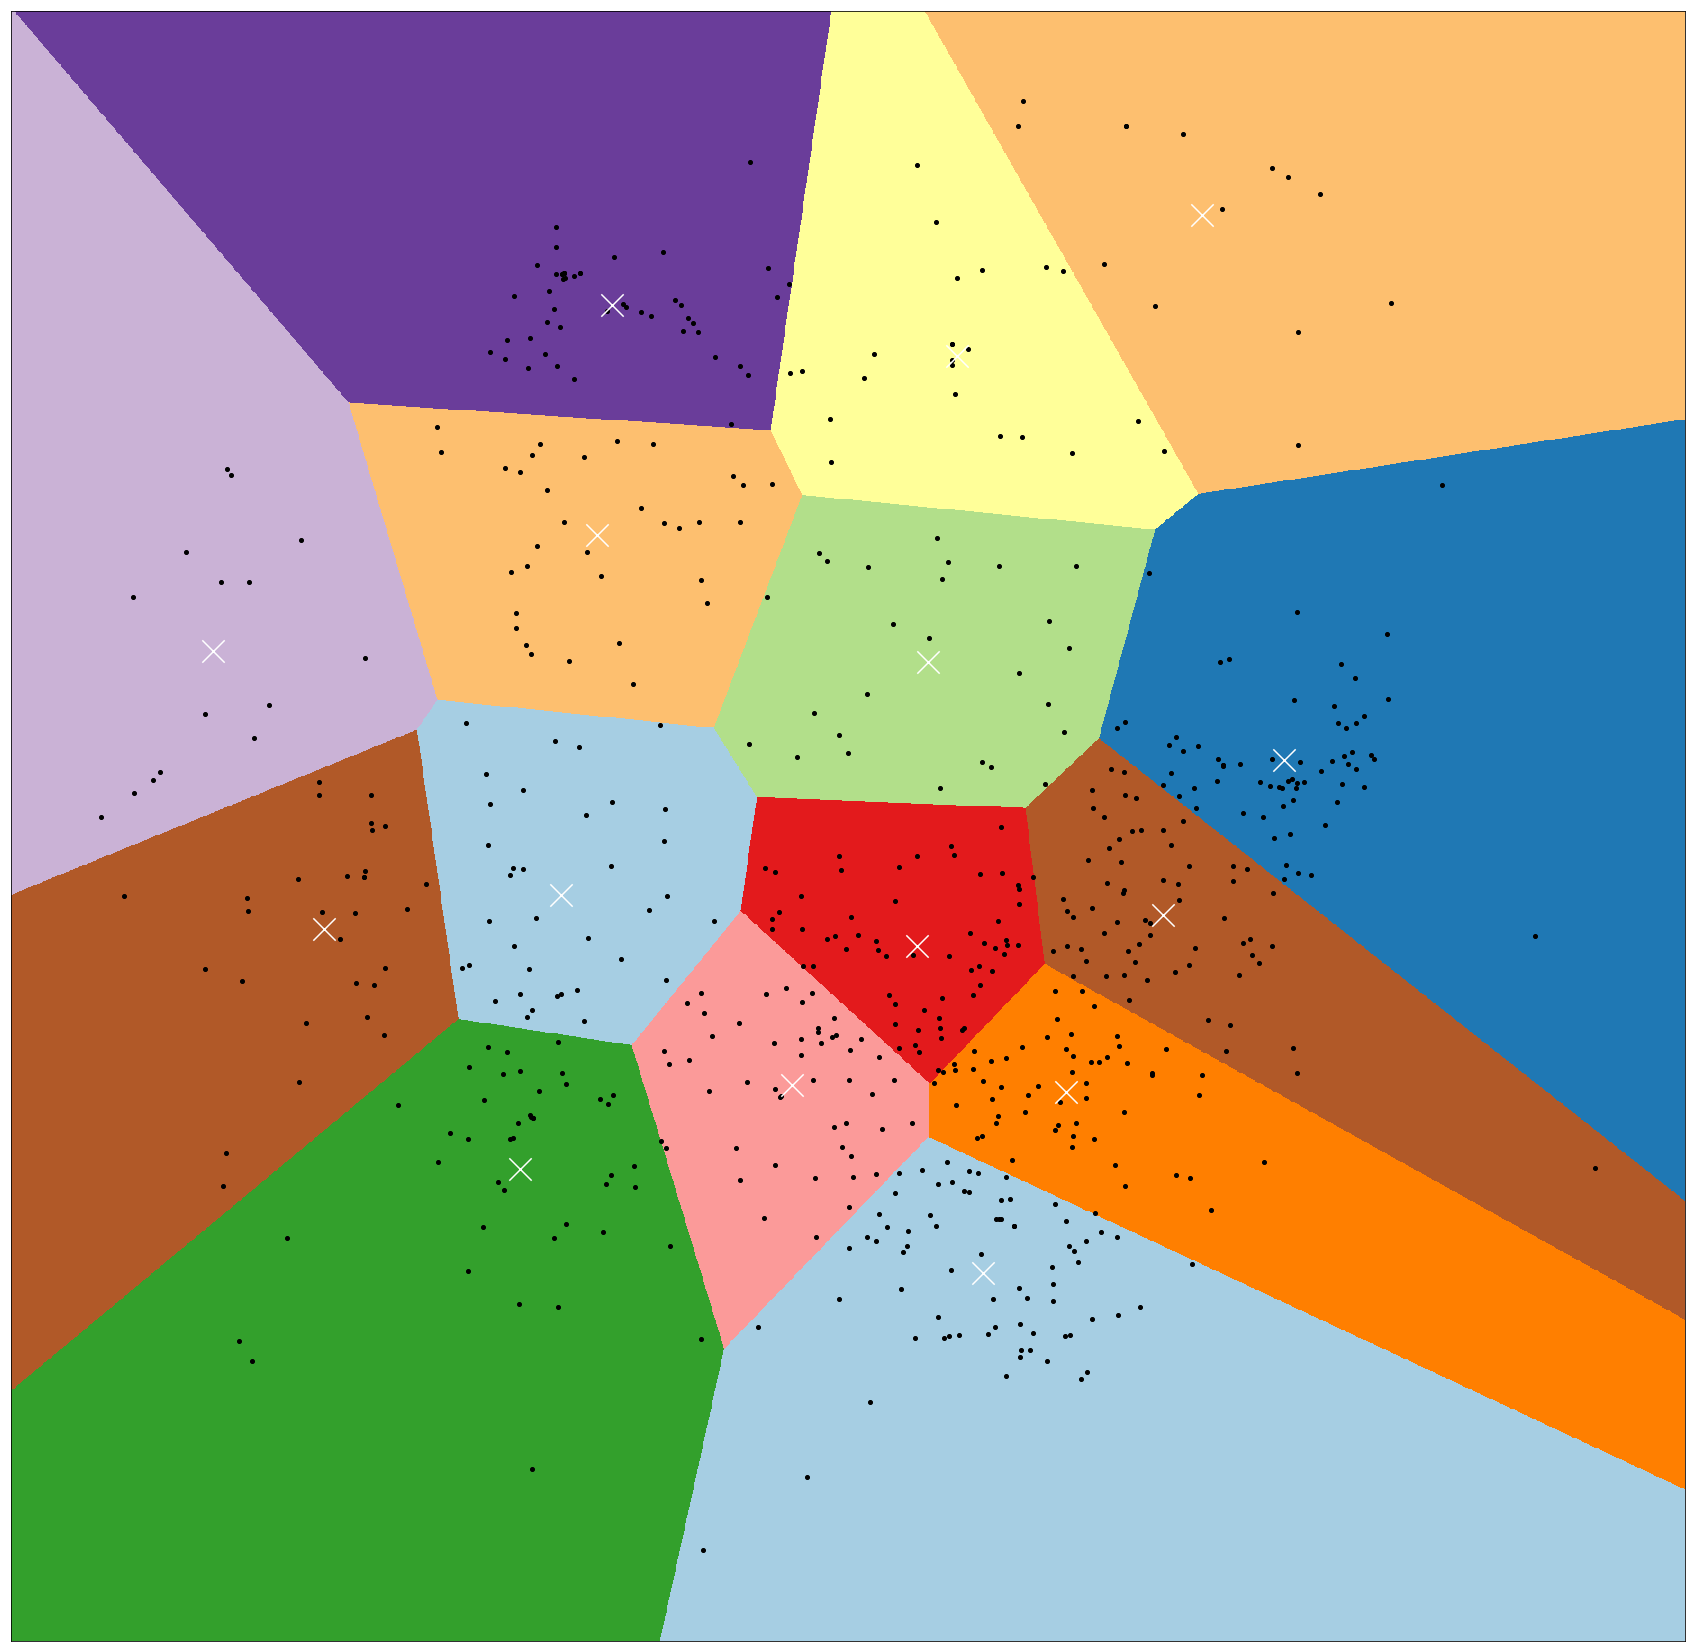

In [13]:
reduced_data = coords

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(30,30))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=8)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

100.0


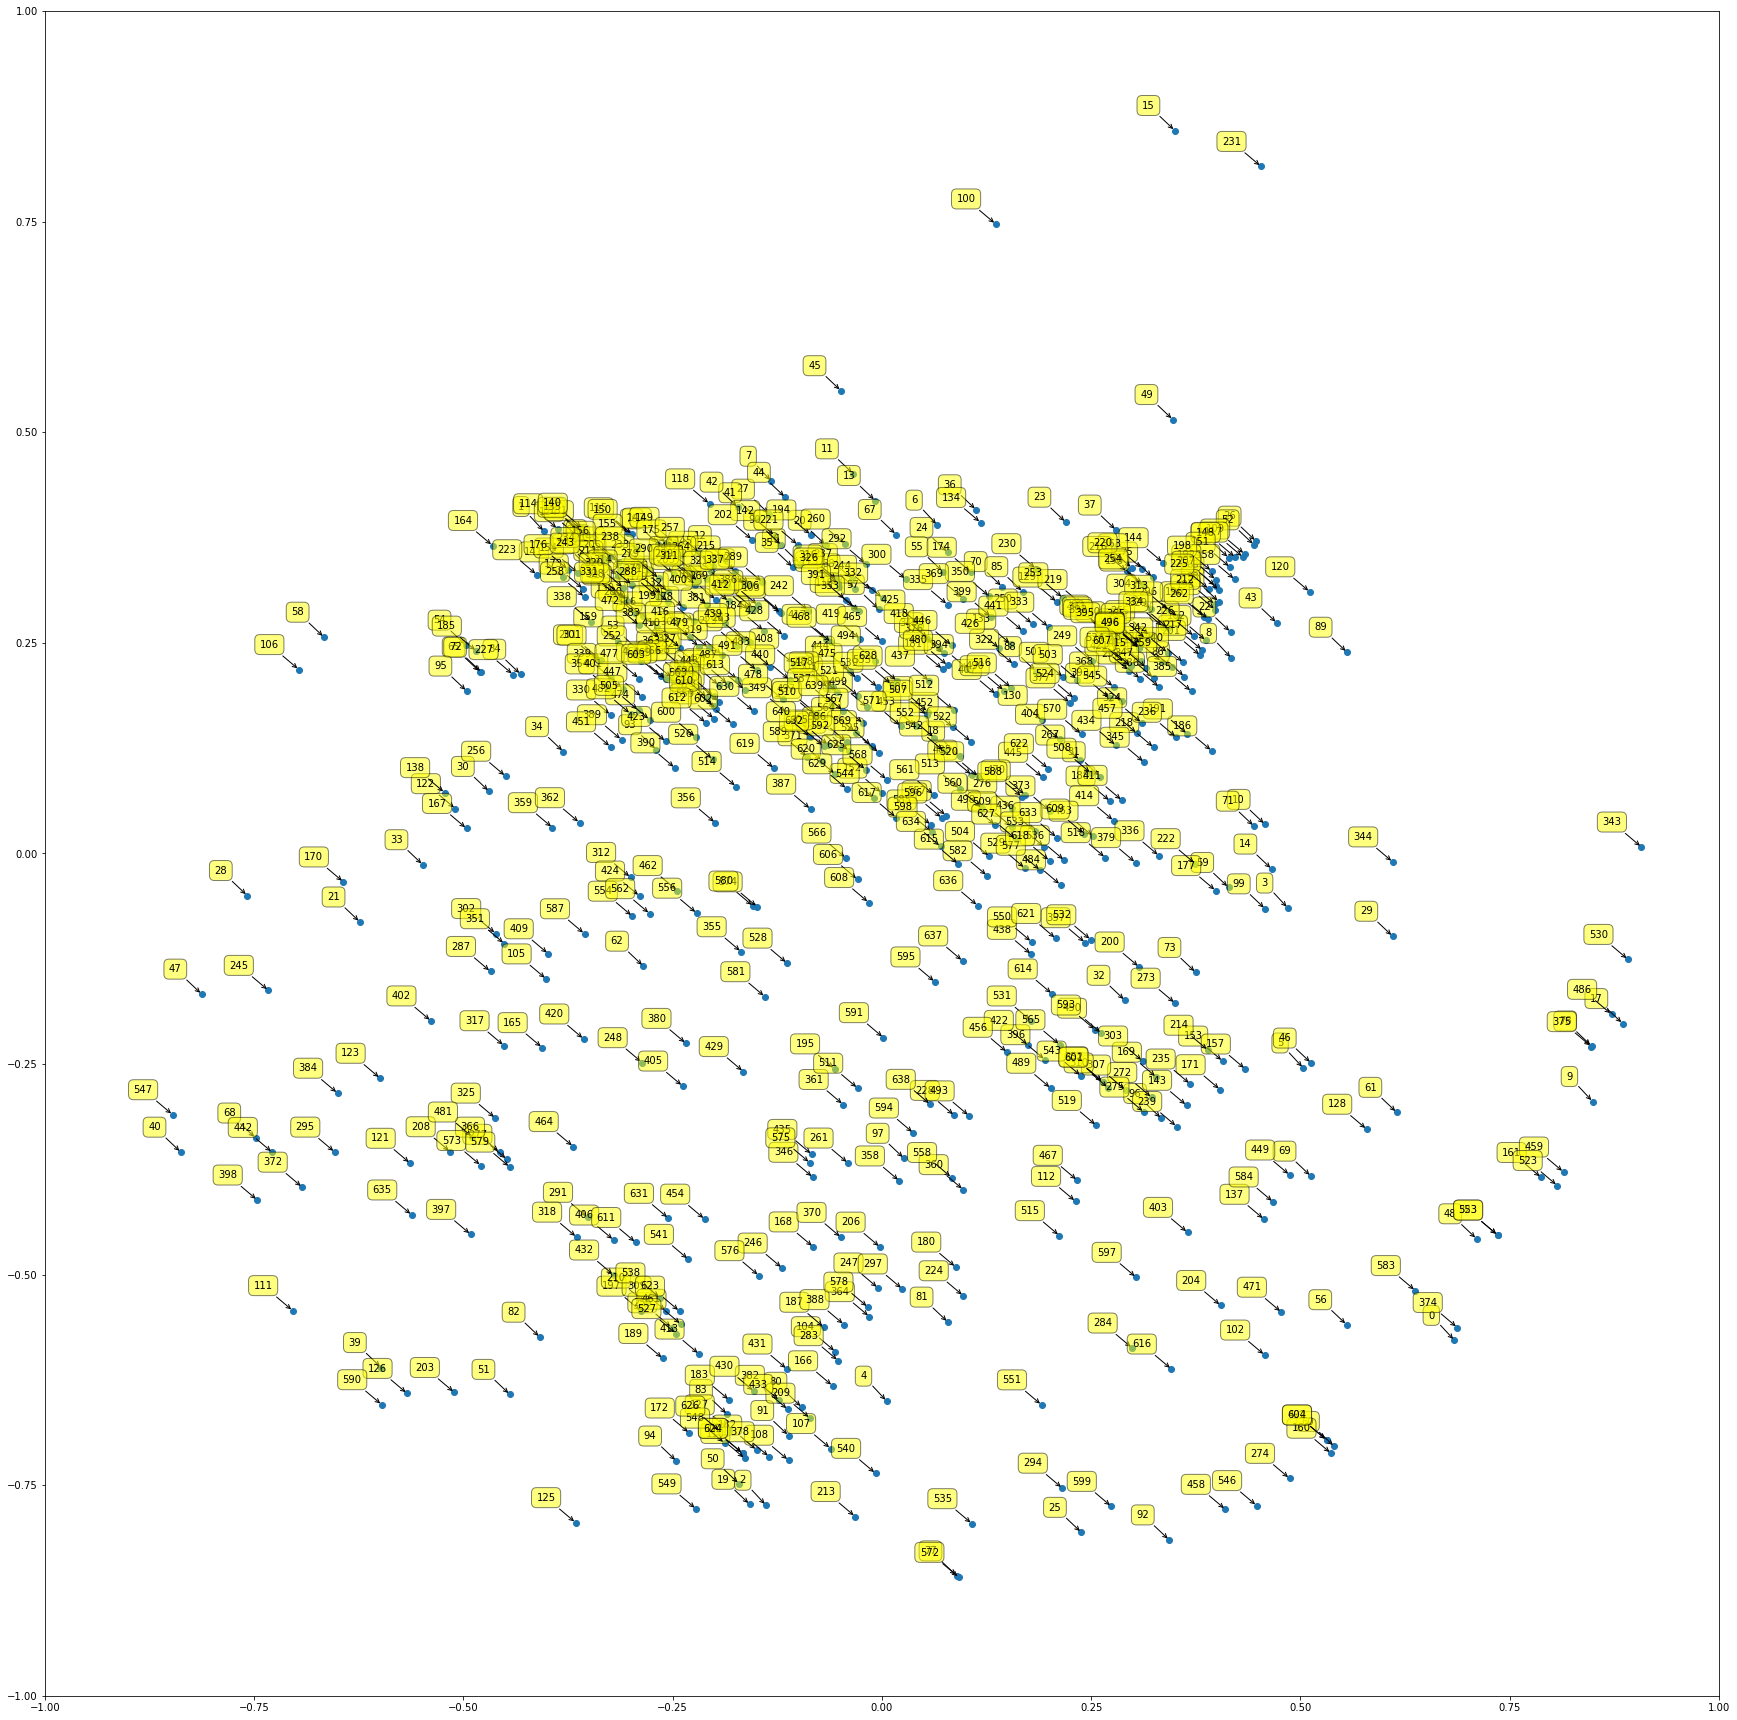

In [7]:
# loads data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(10).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(10).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_25-20-0001(10).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

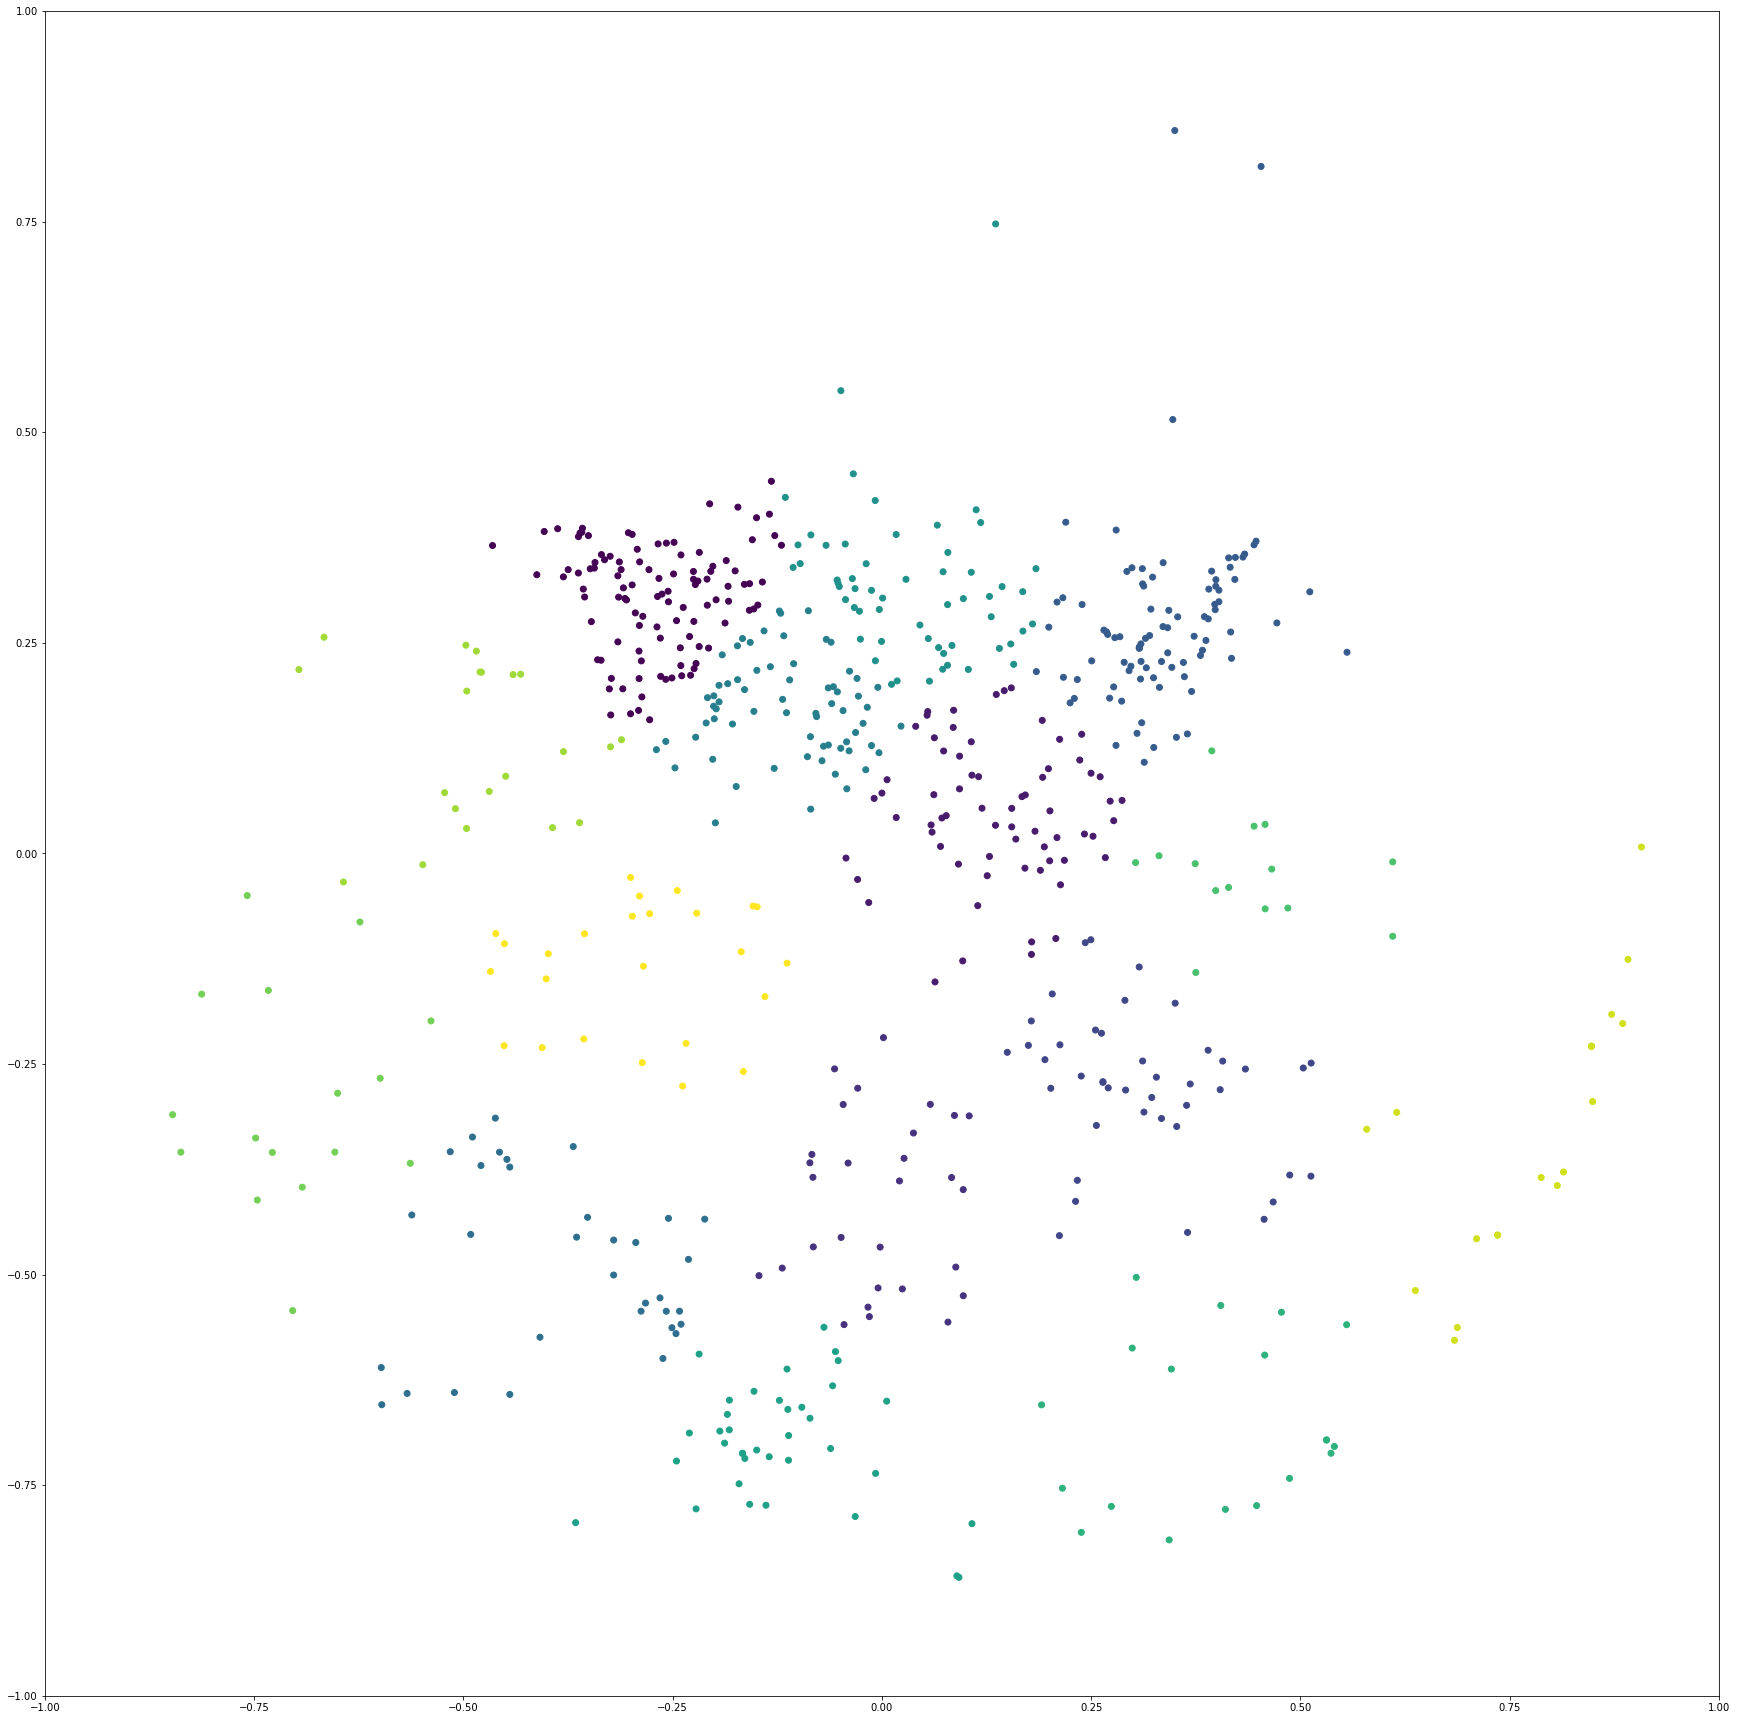

In [8]:
kmeansList = np.asarray(coords)
kmeans = KMeans(n_clusters=15, random_state=0).fit(kmeansList)

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c = kmeans.labels_
    )

plt.show()

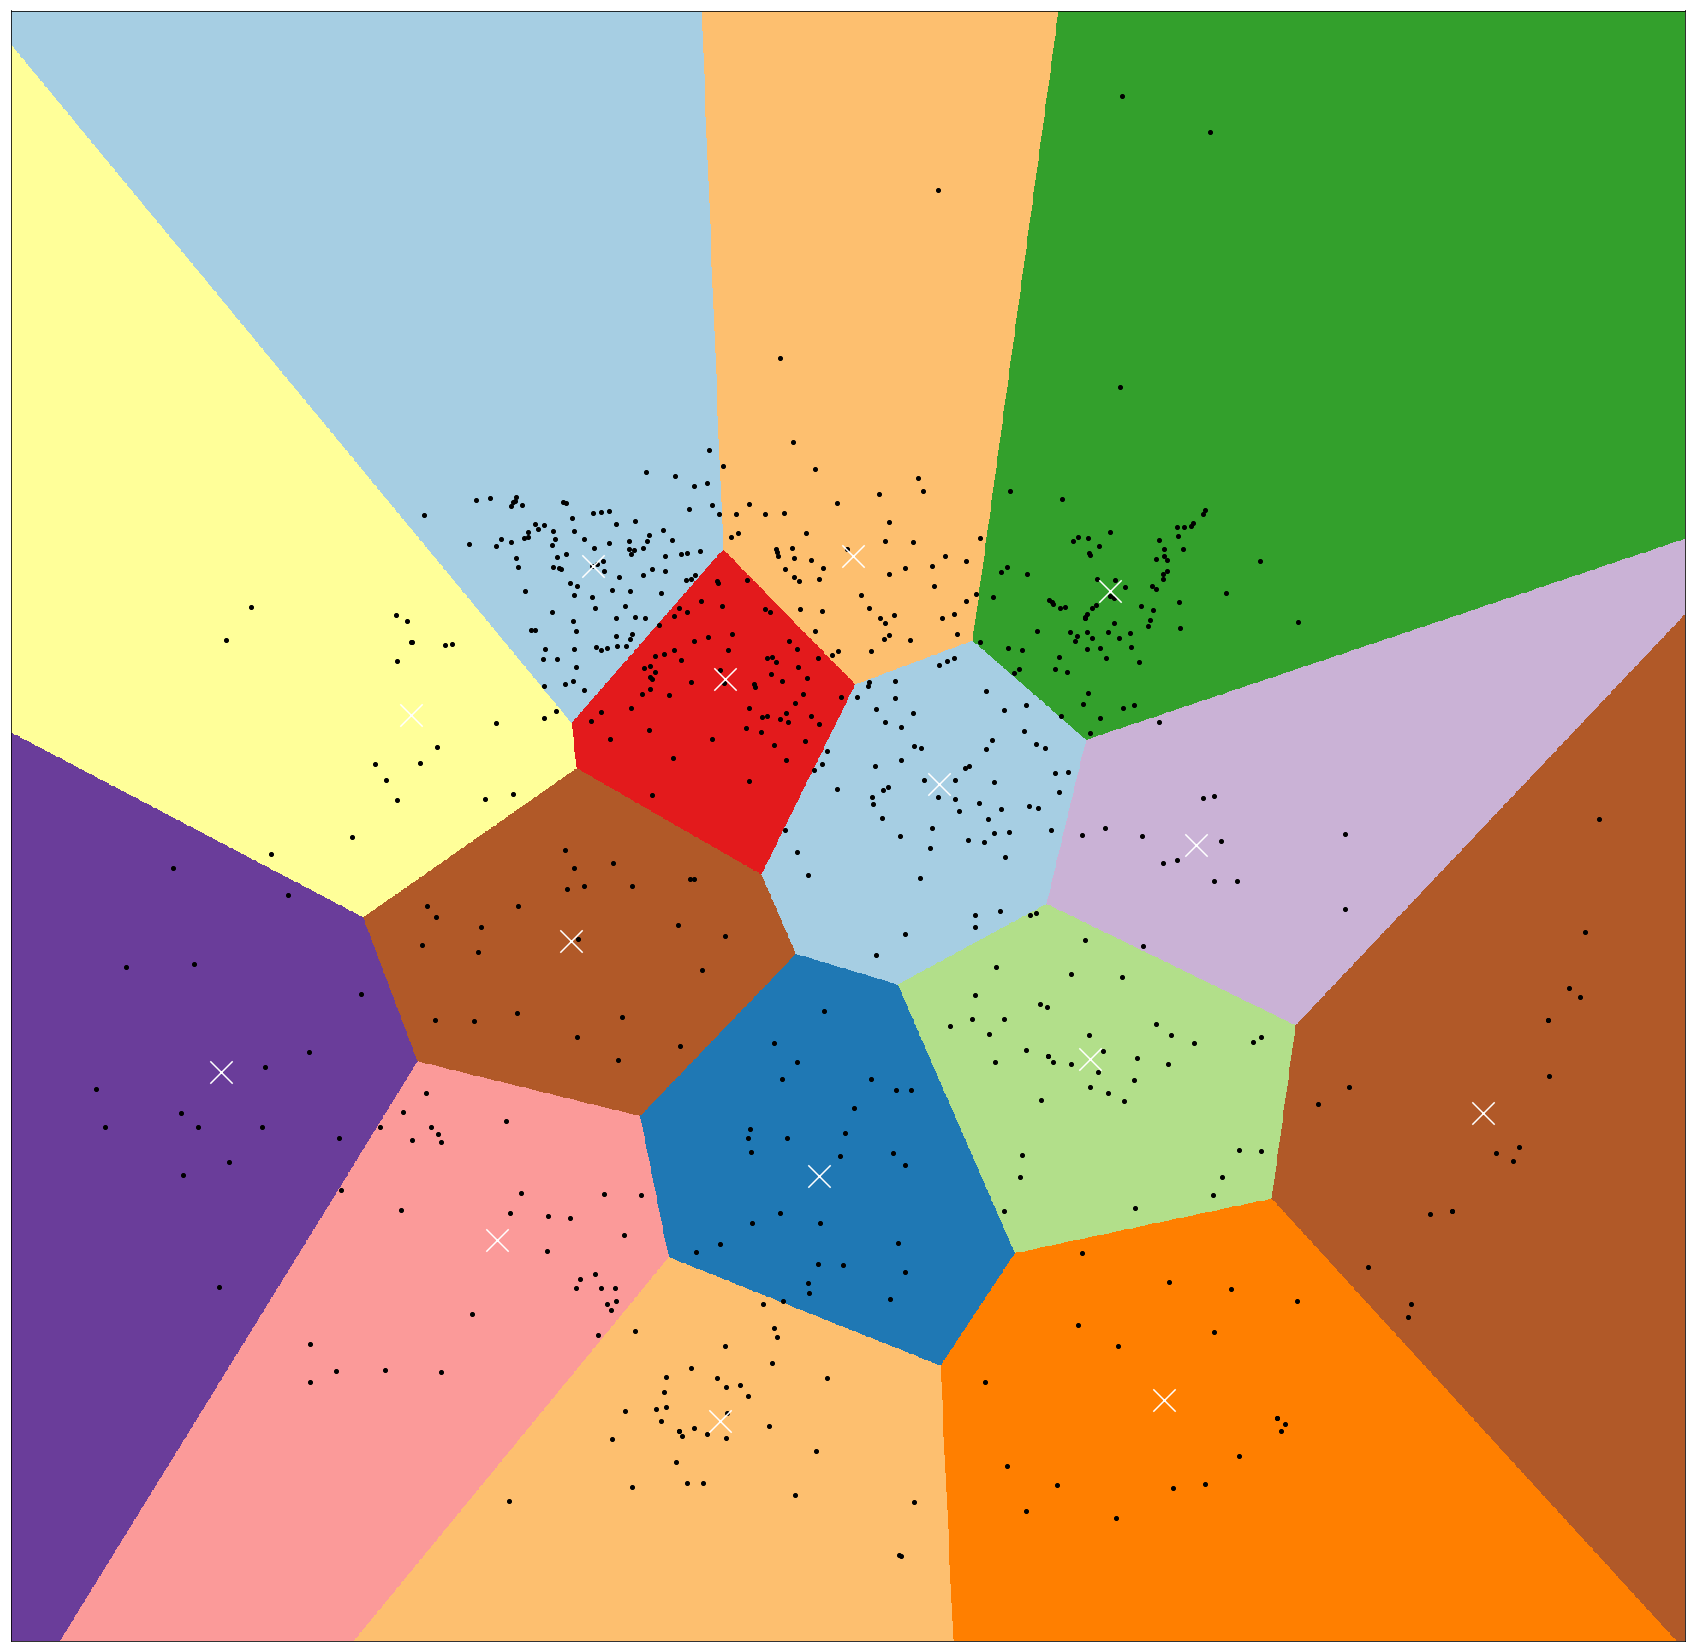

In [9]:
reduced_data = coords

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(30,30))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=8)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

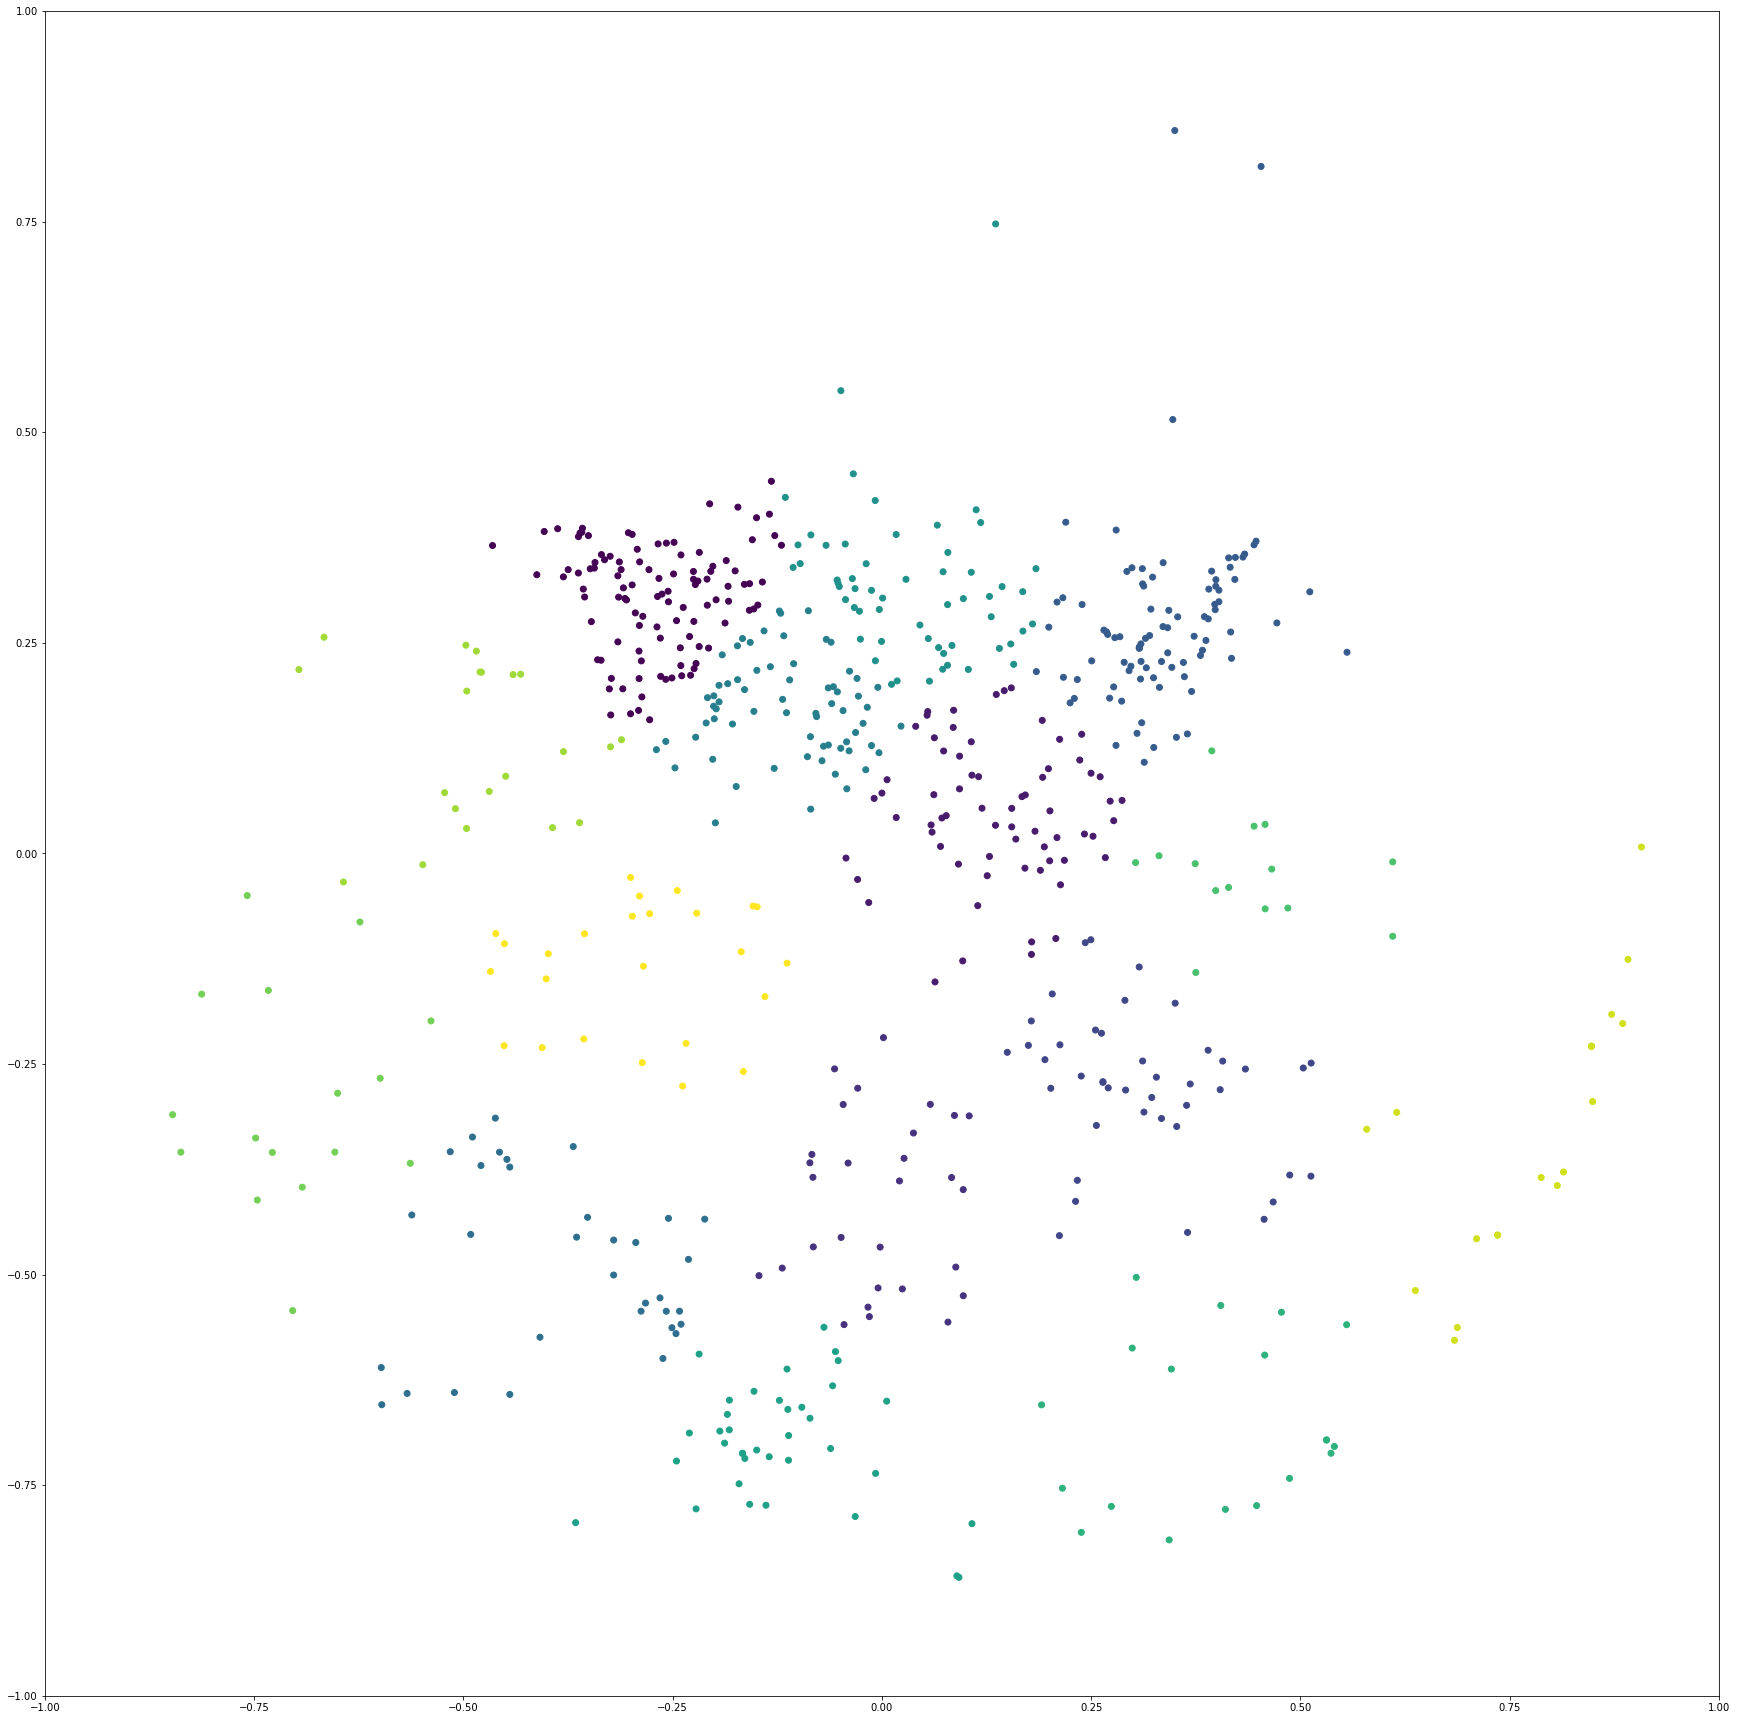

In [61]:
kmeansList = np.asarray(coords)
kmeans = KMeans(n_clusters=15, random_state=0).fit(kmeansList)

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c = kmeans.labels_
    )

plt.show()

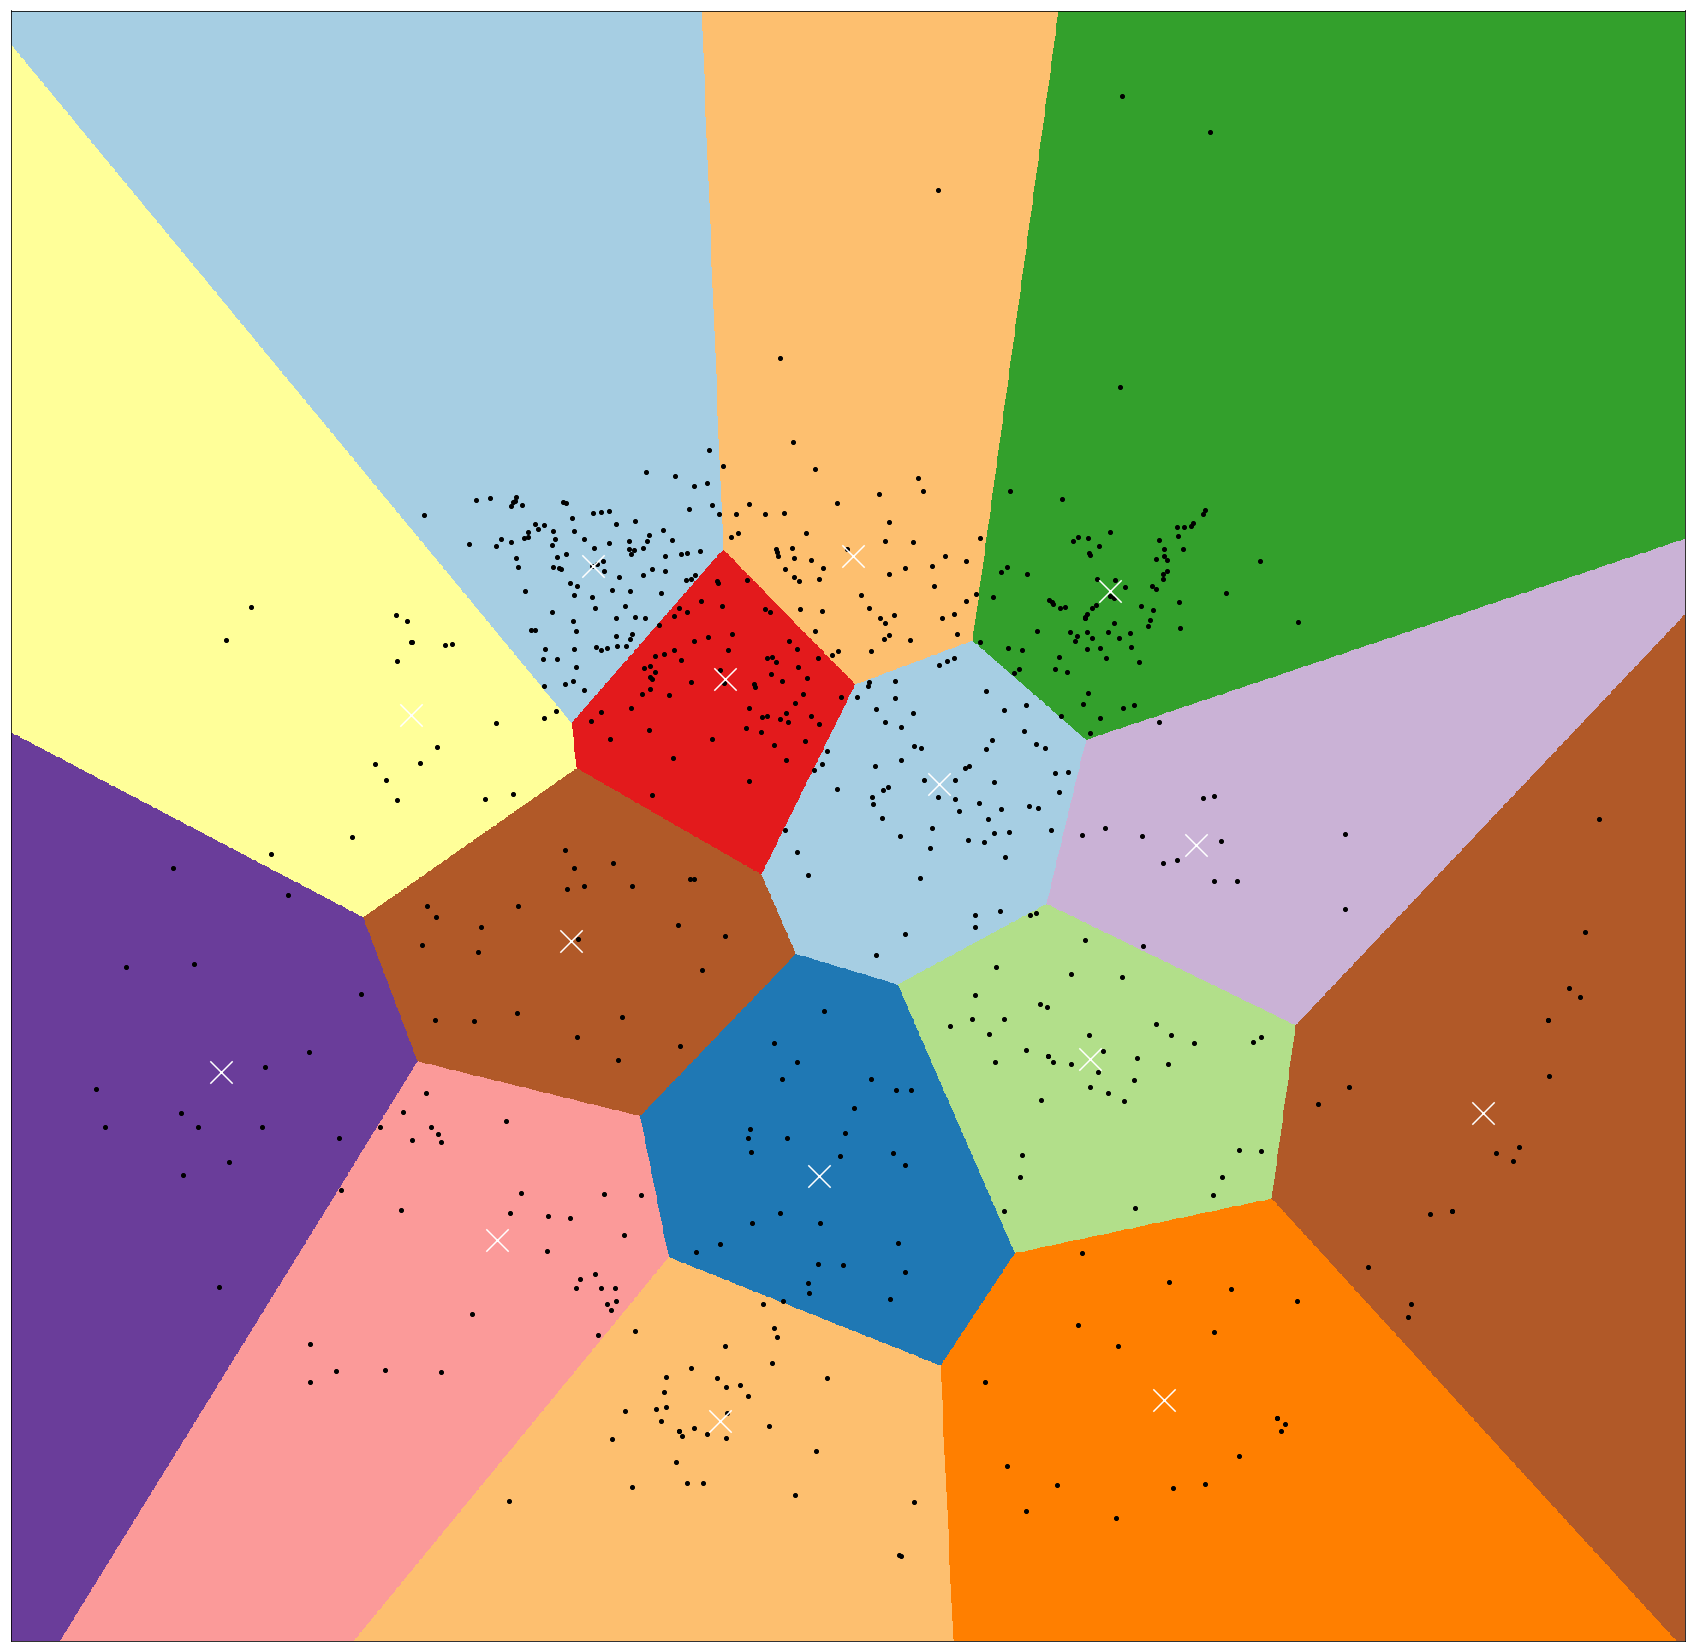

In [73]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(30,30))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=8)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

100.0


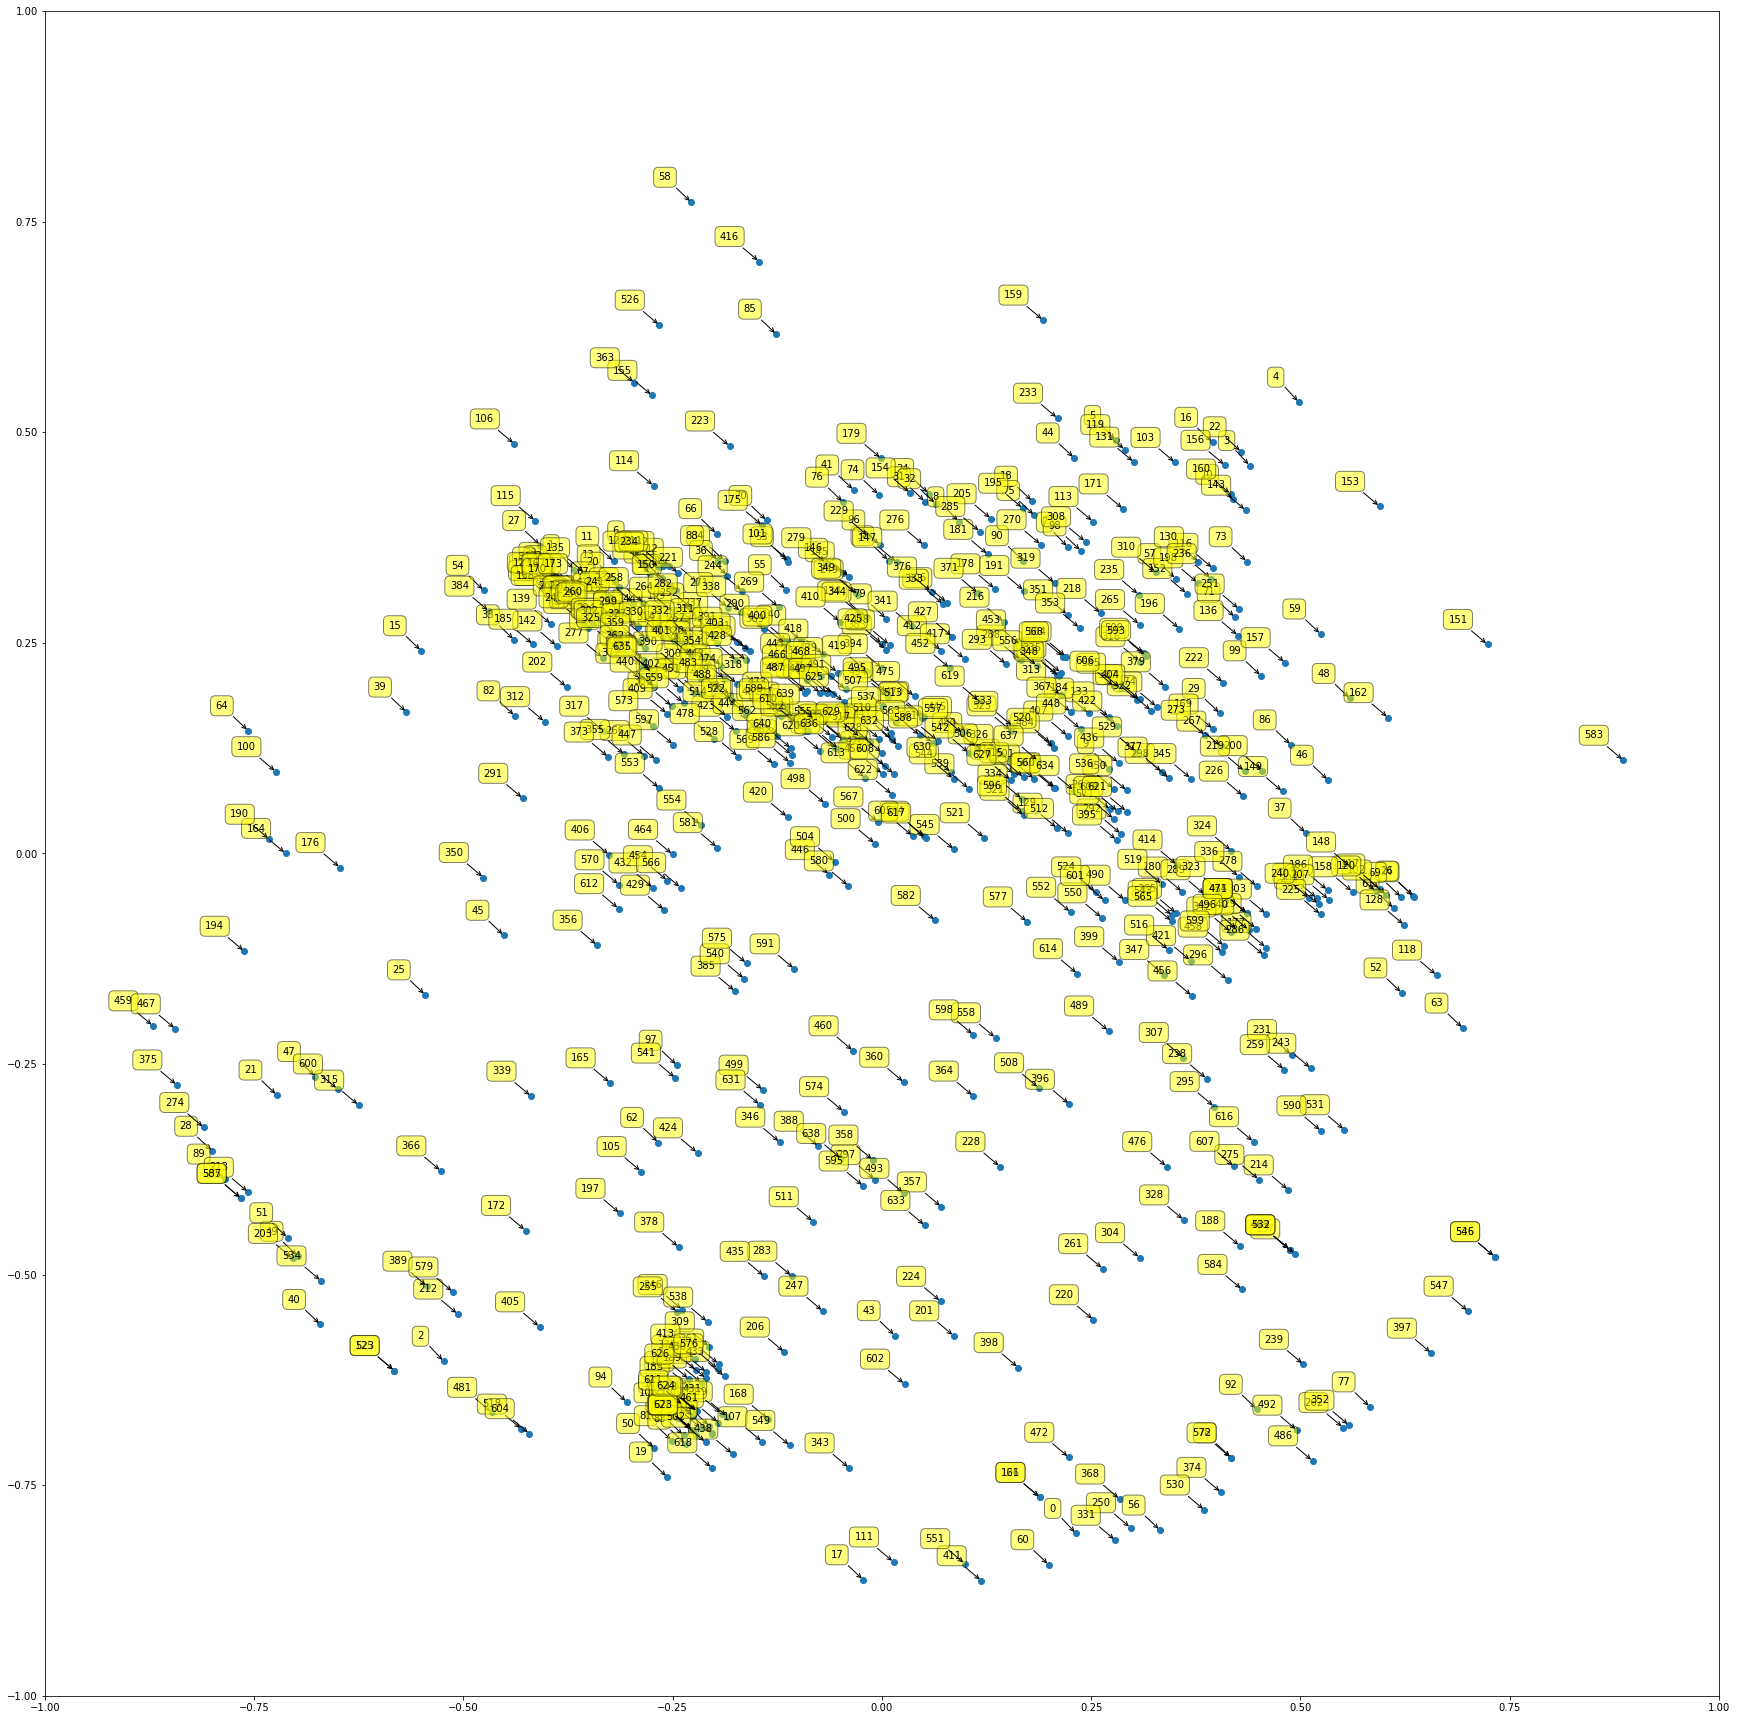

In [7]:
# loads data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(9).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(9).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_30-20-0001(9).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


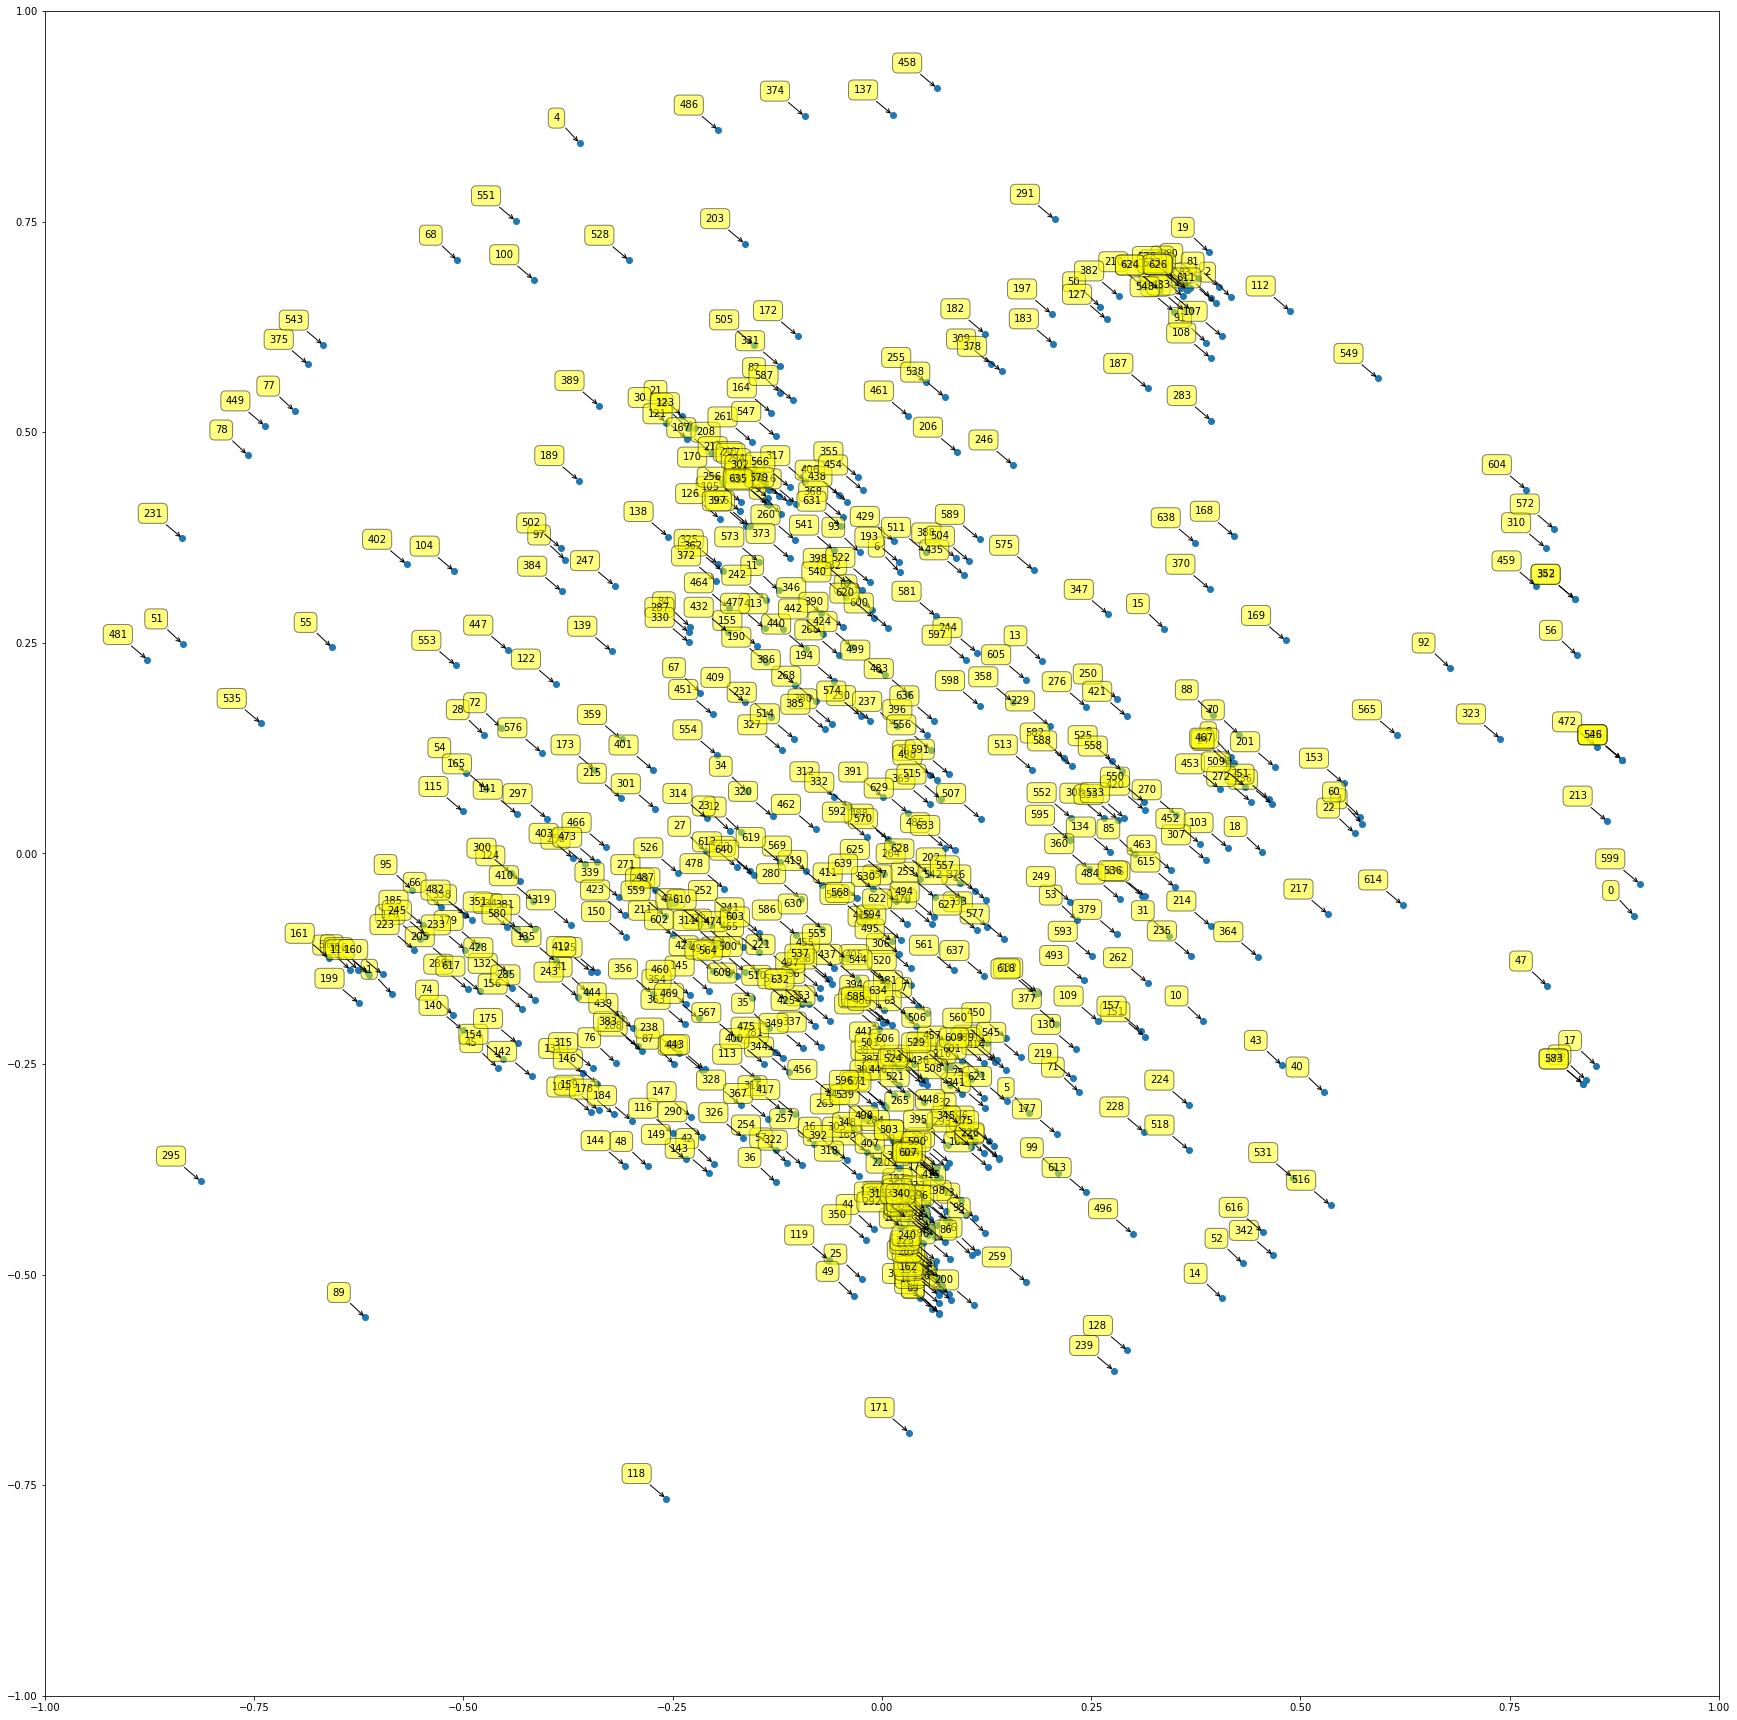

In [23]:
# loads data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(8).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(8).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_20-20-0001(8).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


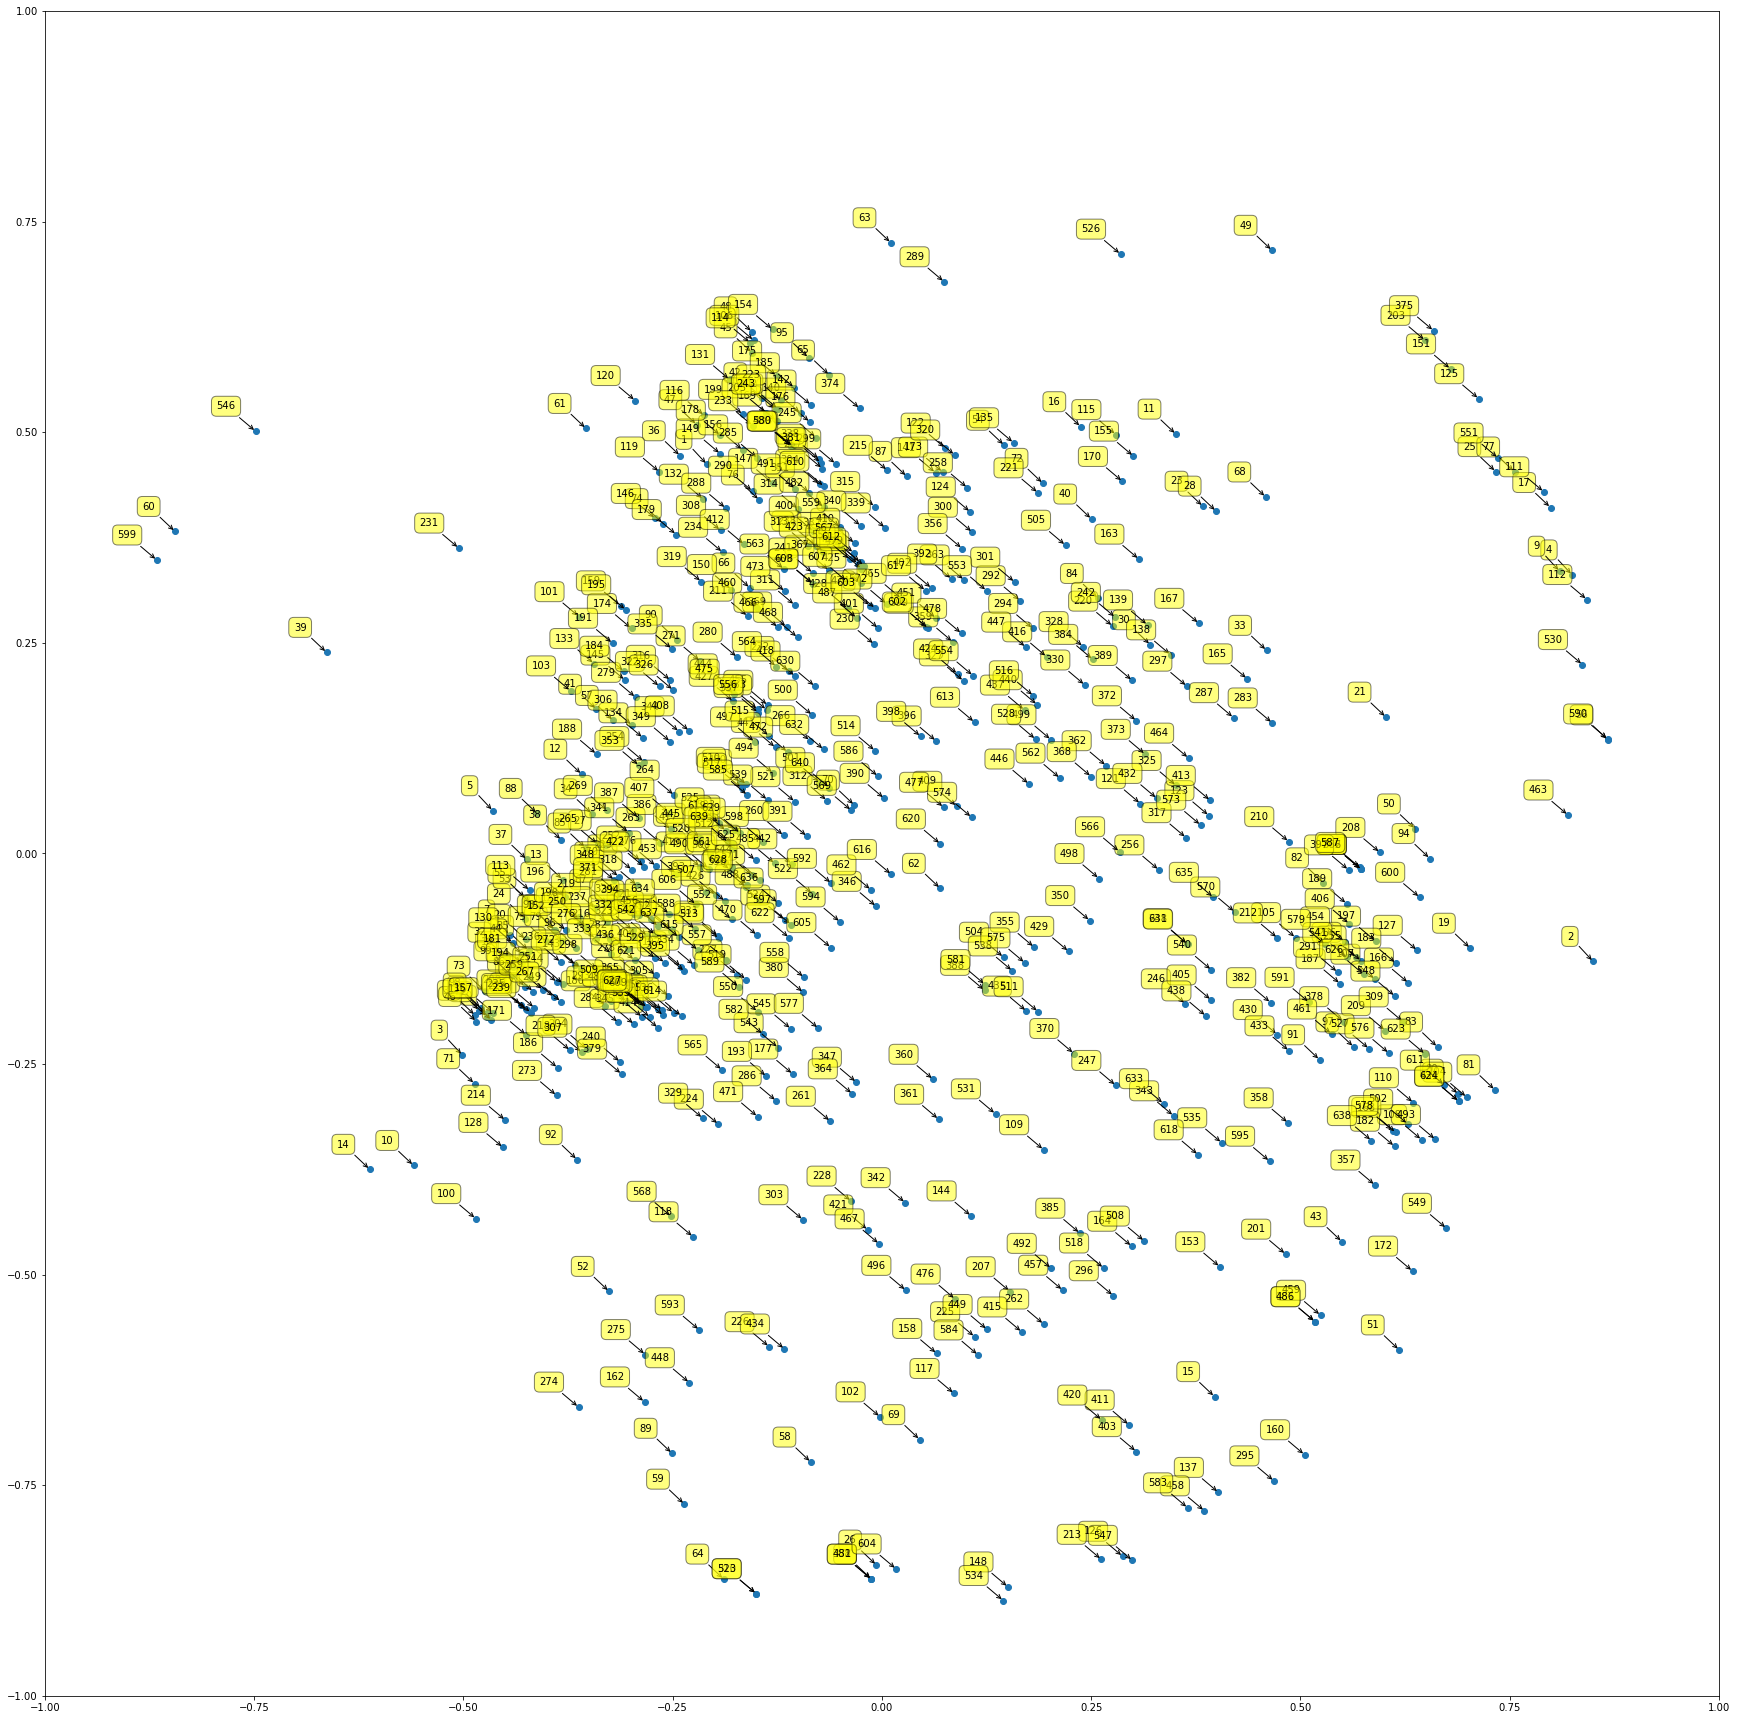

In [17]:
# Loaded Data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(7).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(7).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_30-20-0001(7).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


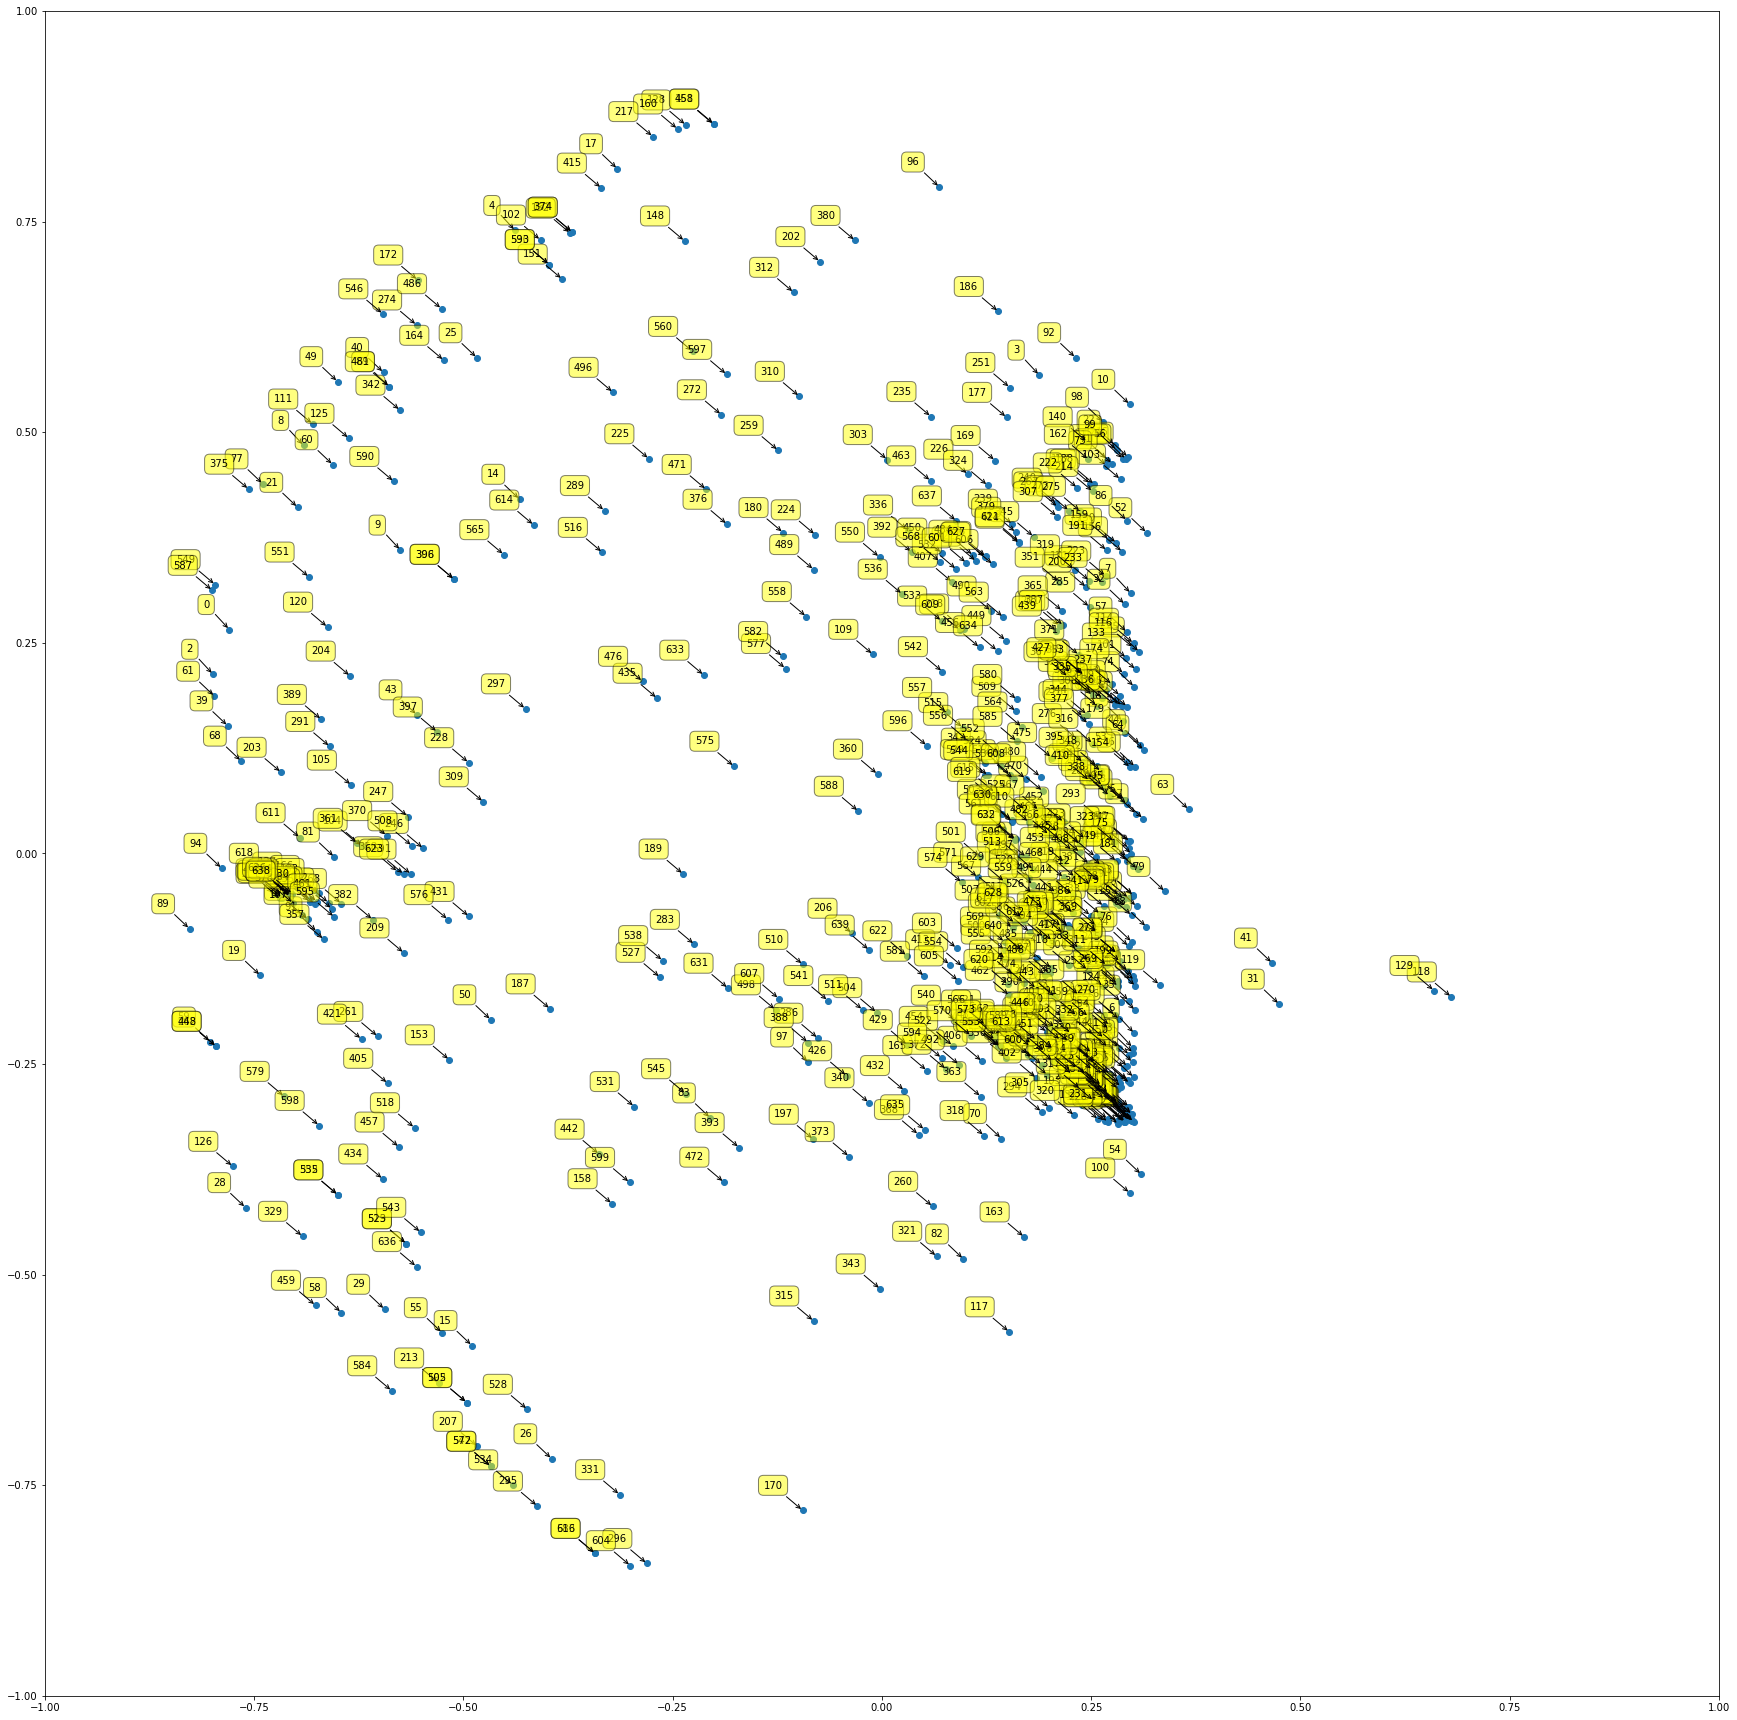

In [11]:
# Loaded Data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(6).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(6).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_30-20-0001(6).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


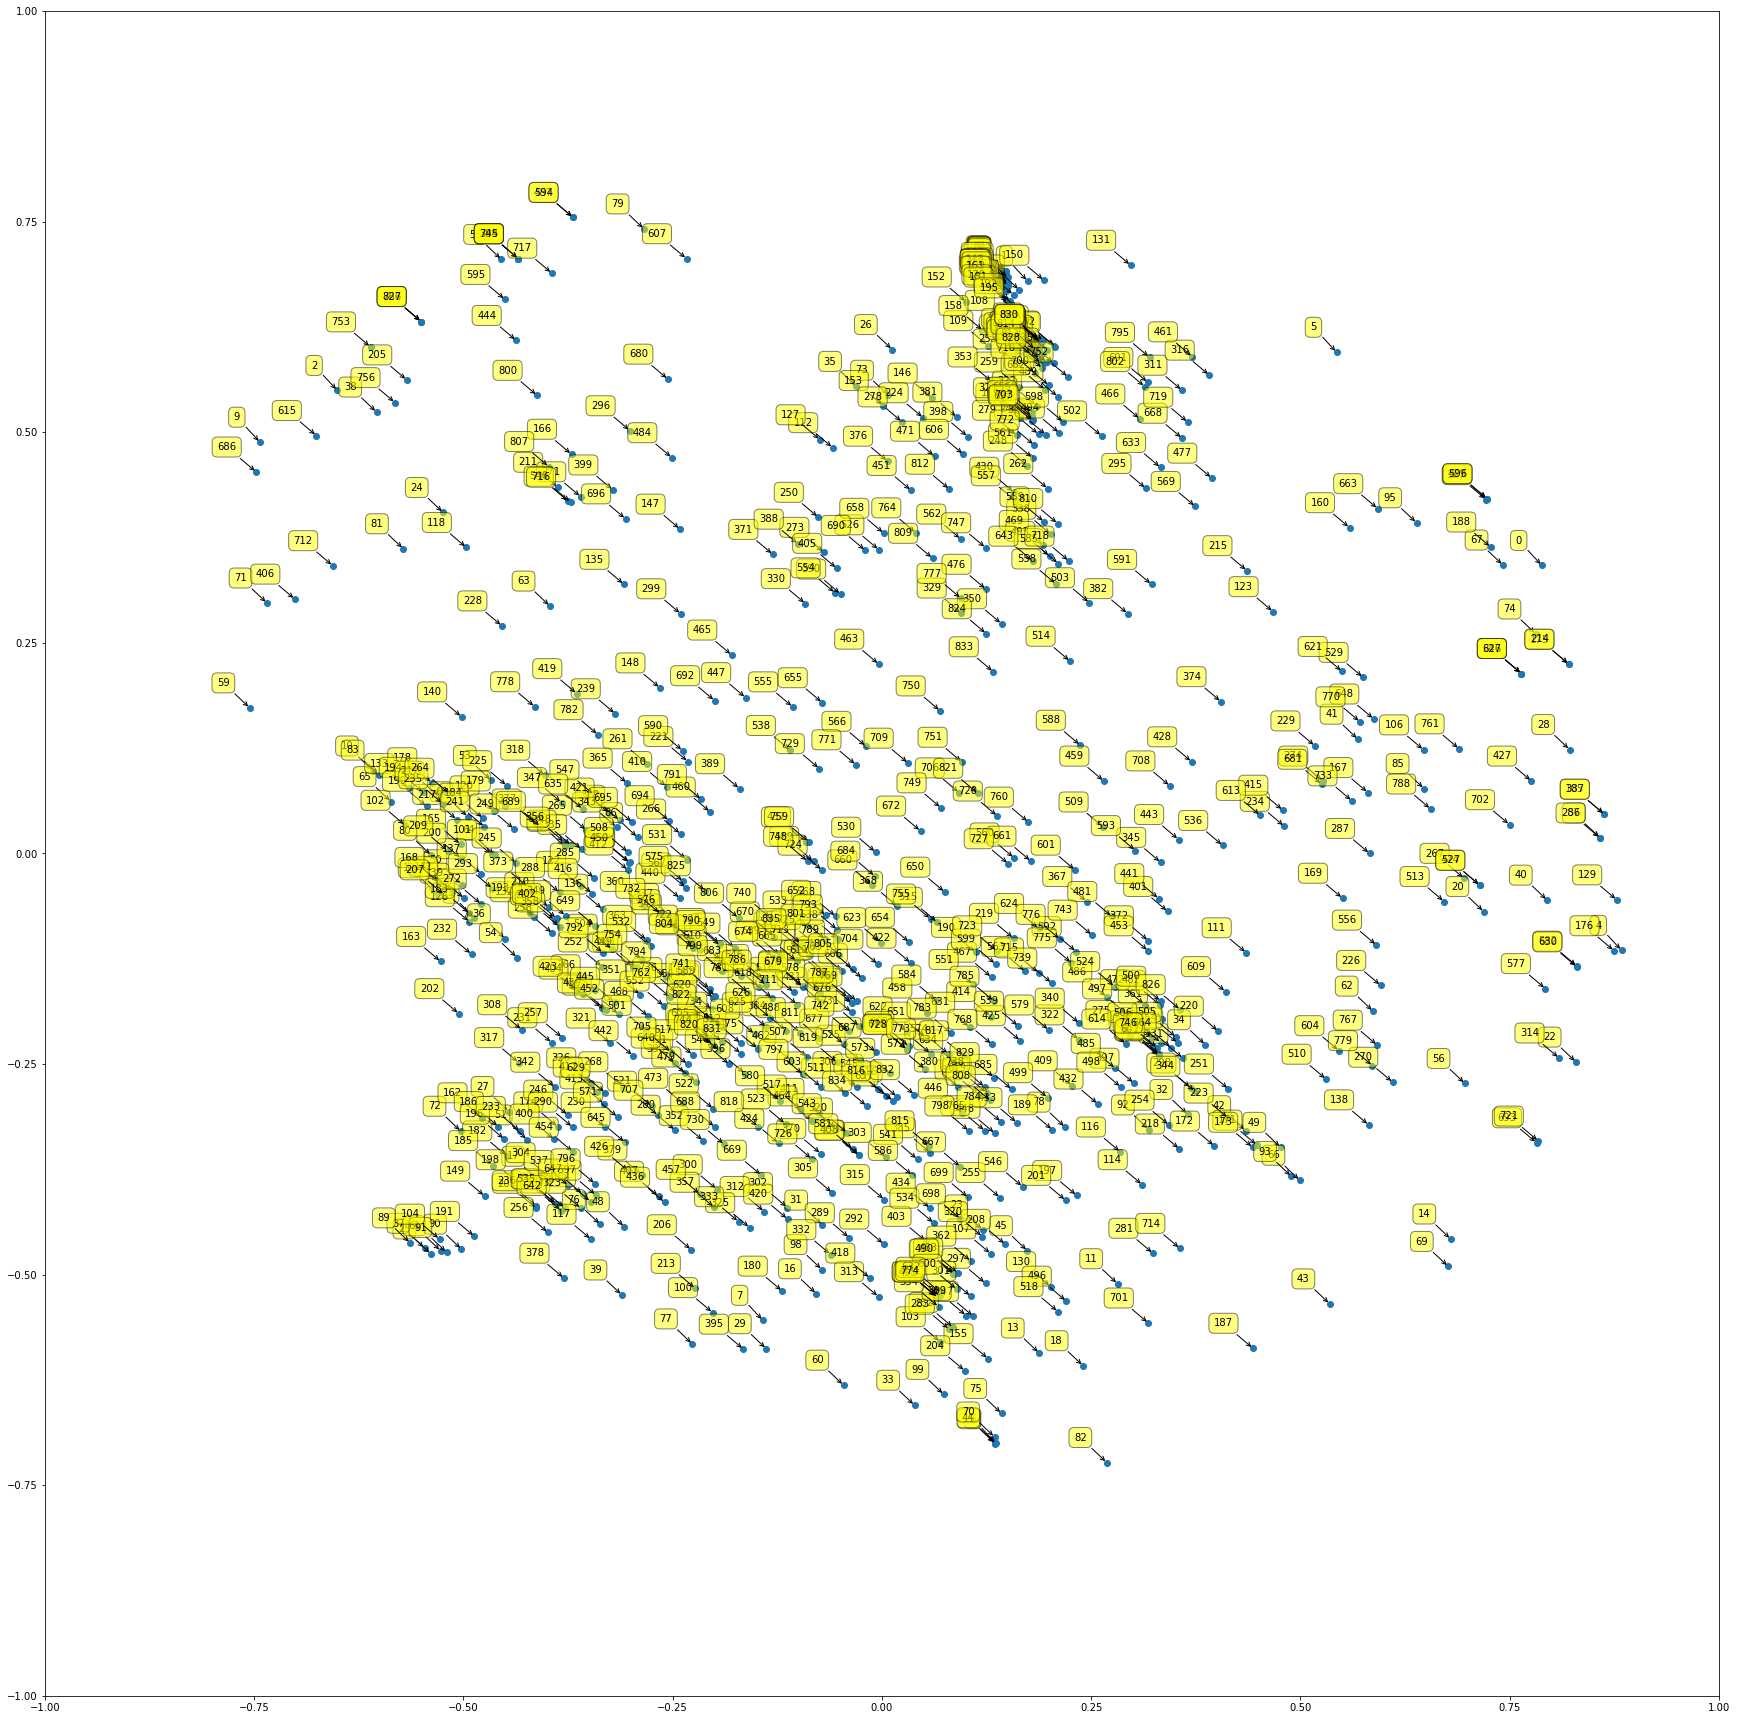

In [34]:
# Loaded Data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(5).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(5).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_20-20-0001(5).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


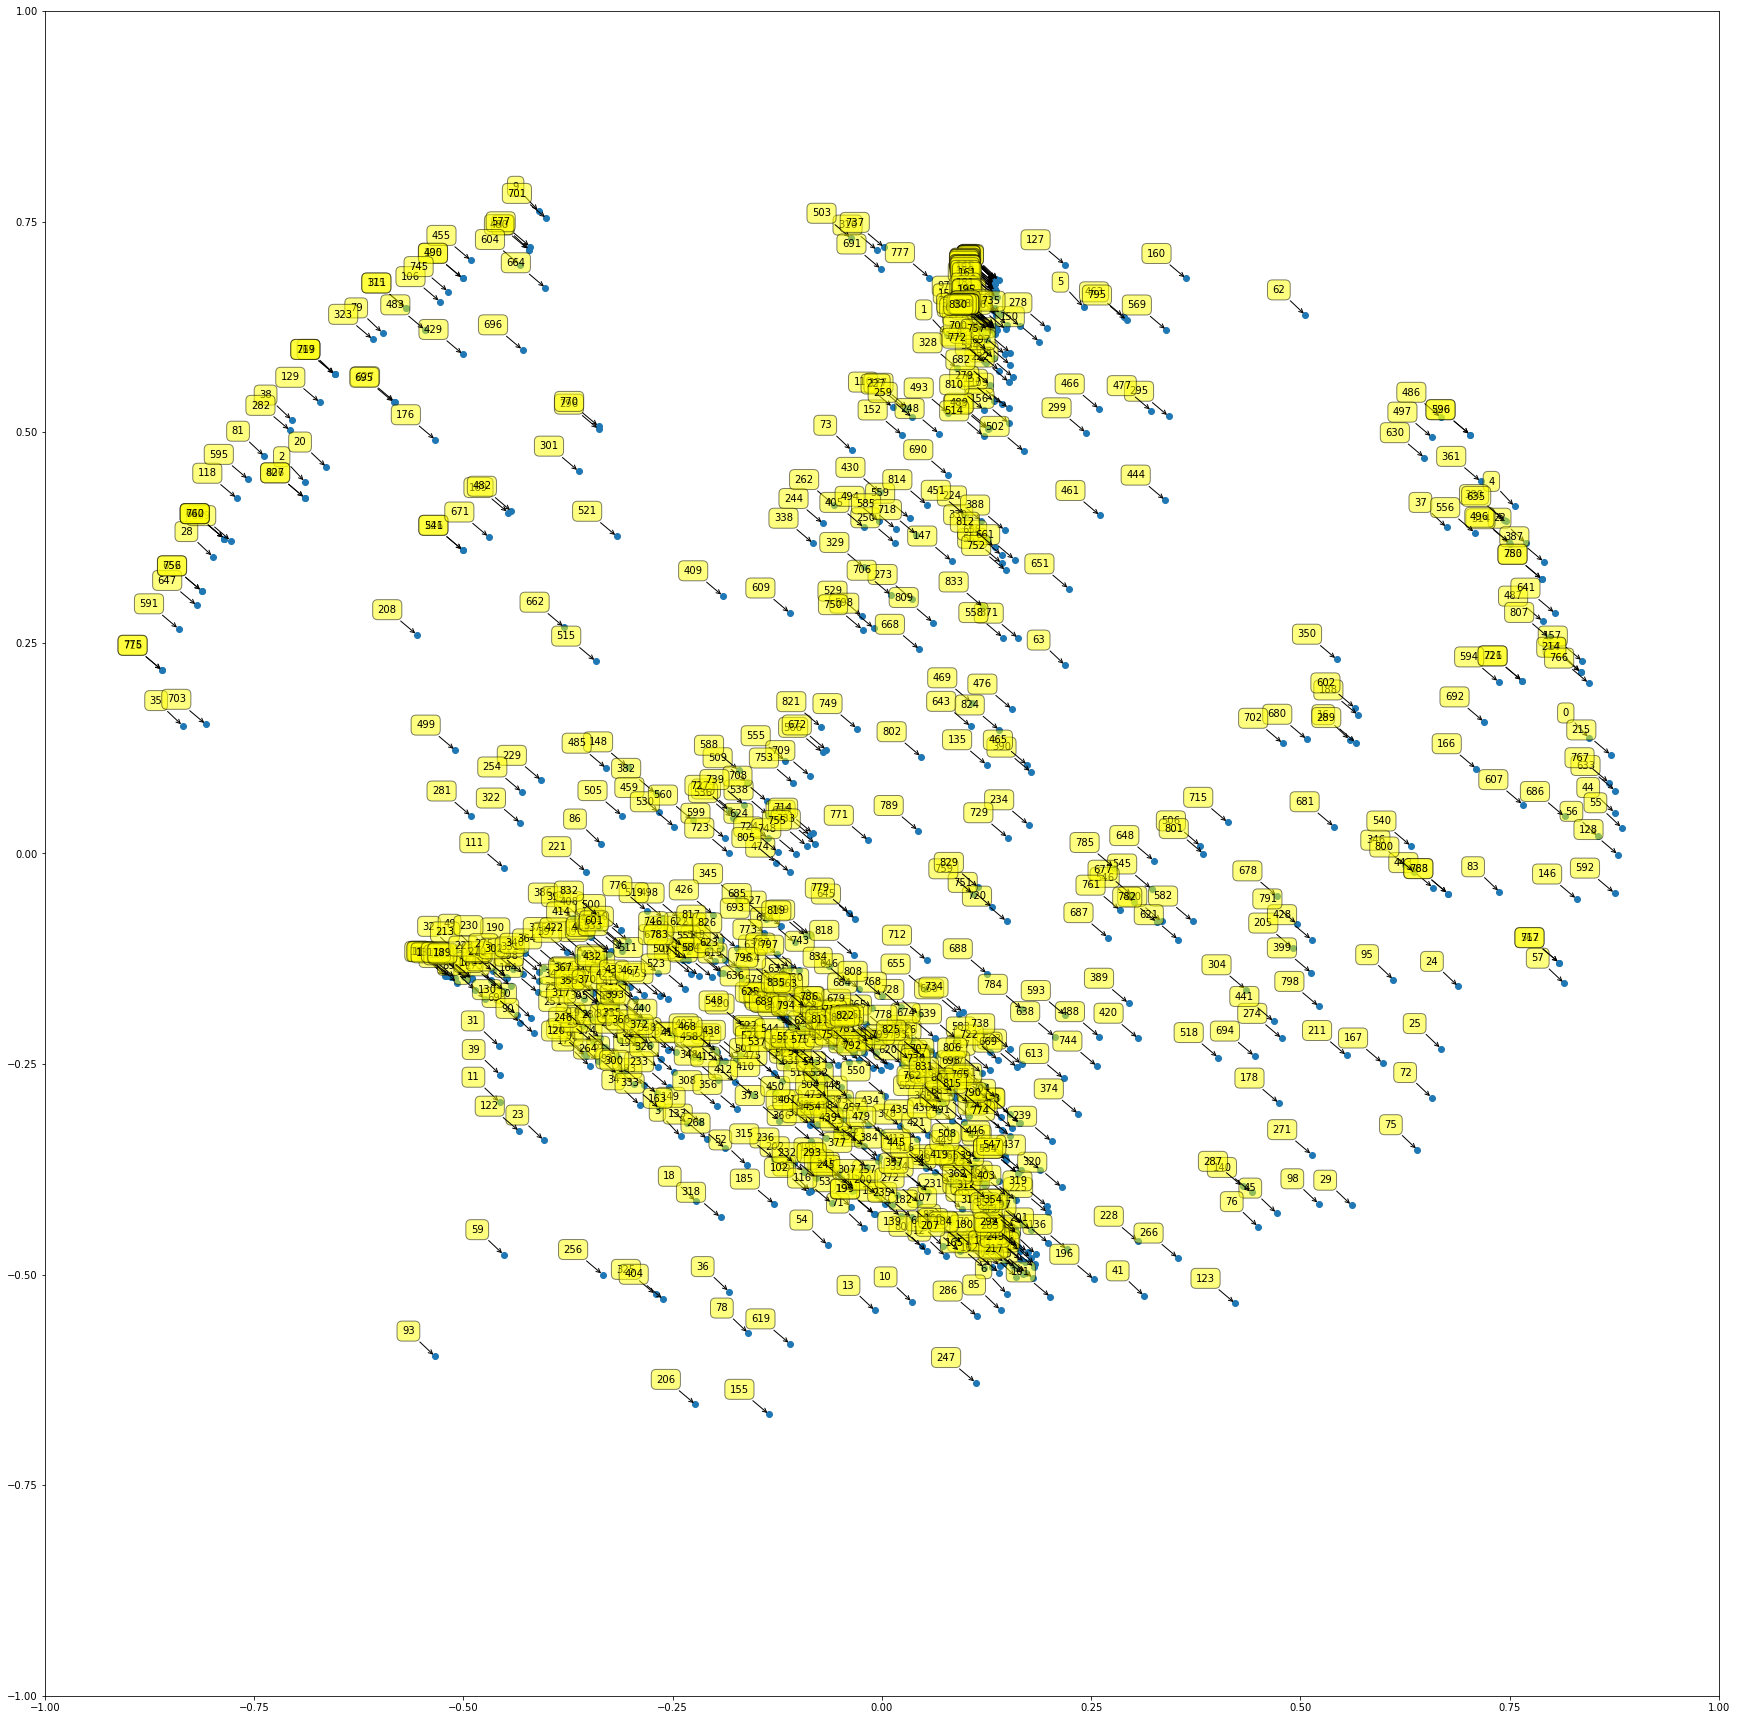

In [22]:
# Loaded Data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(4).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(4).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_40-20-0001(4).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


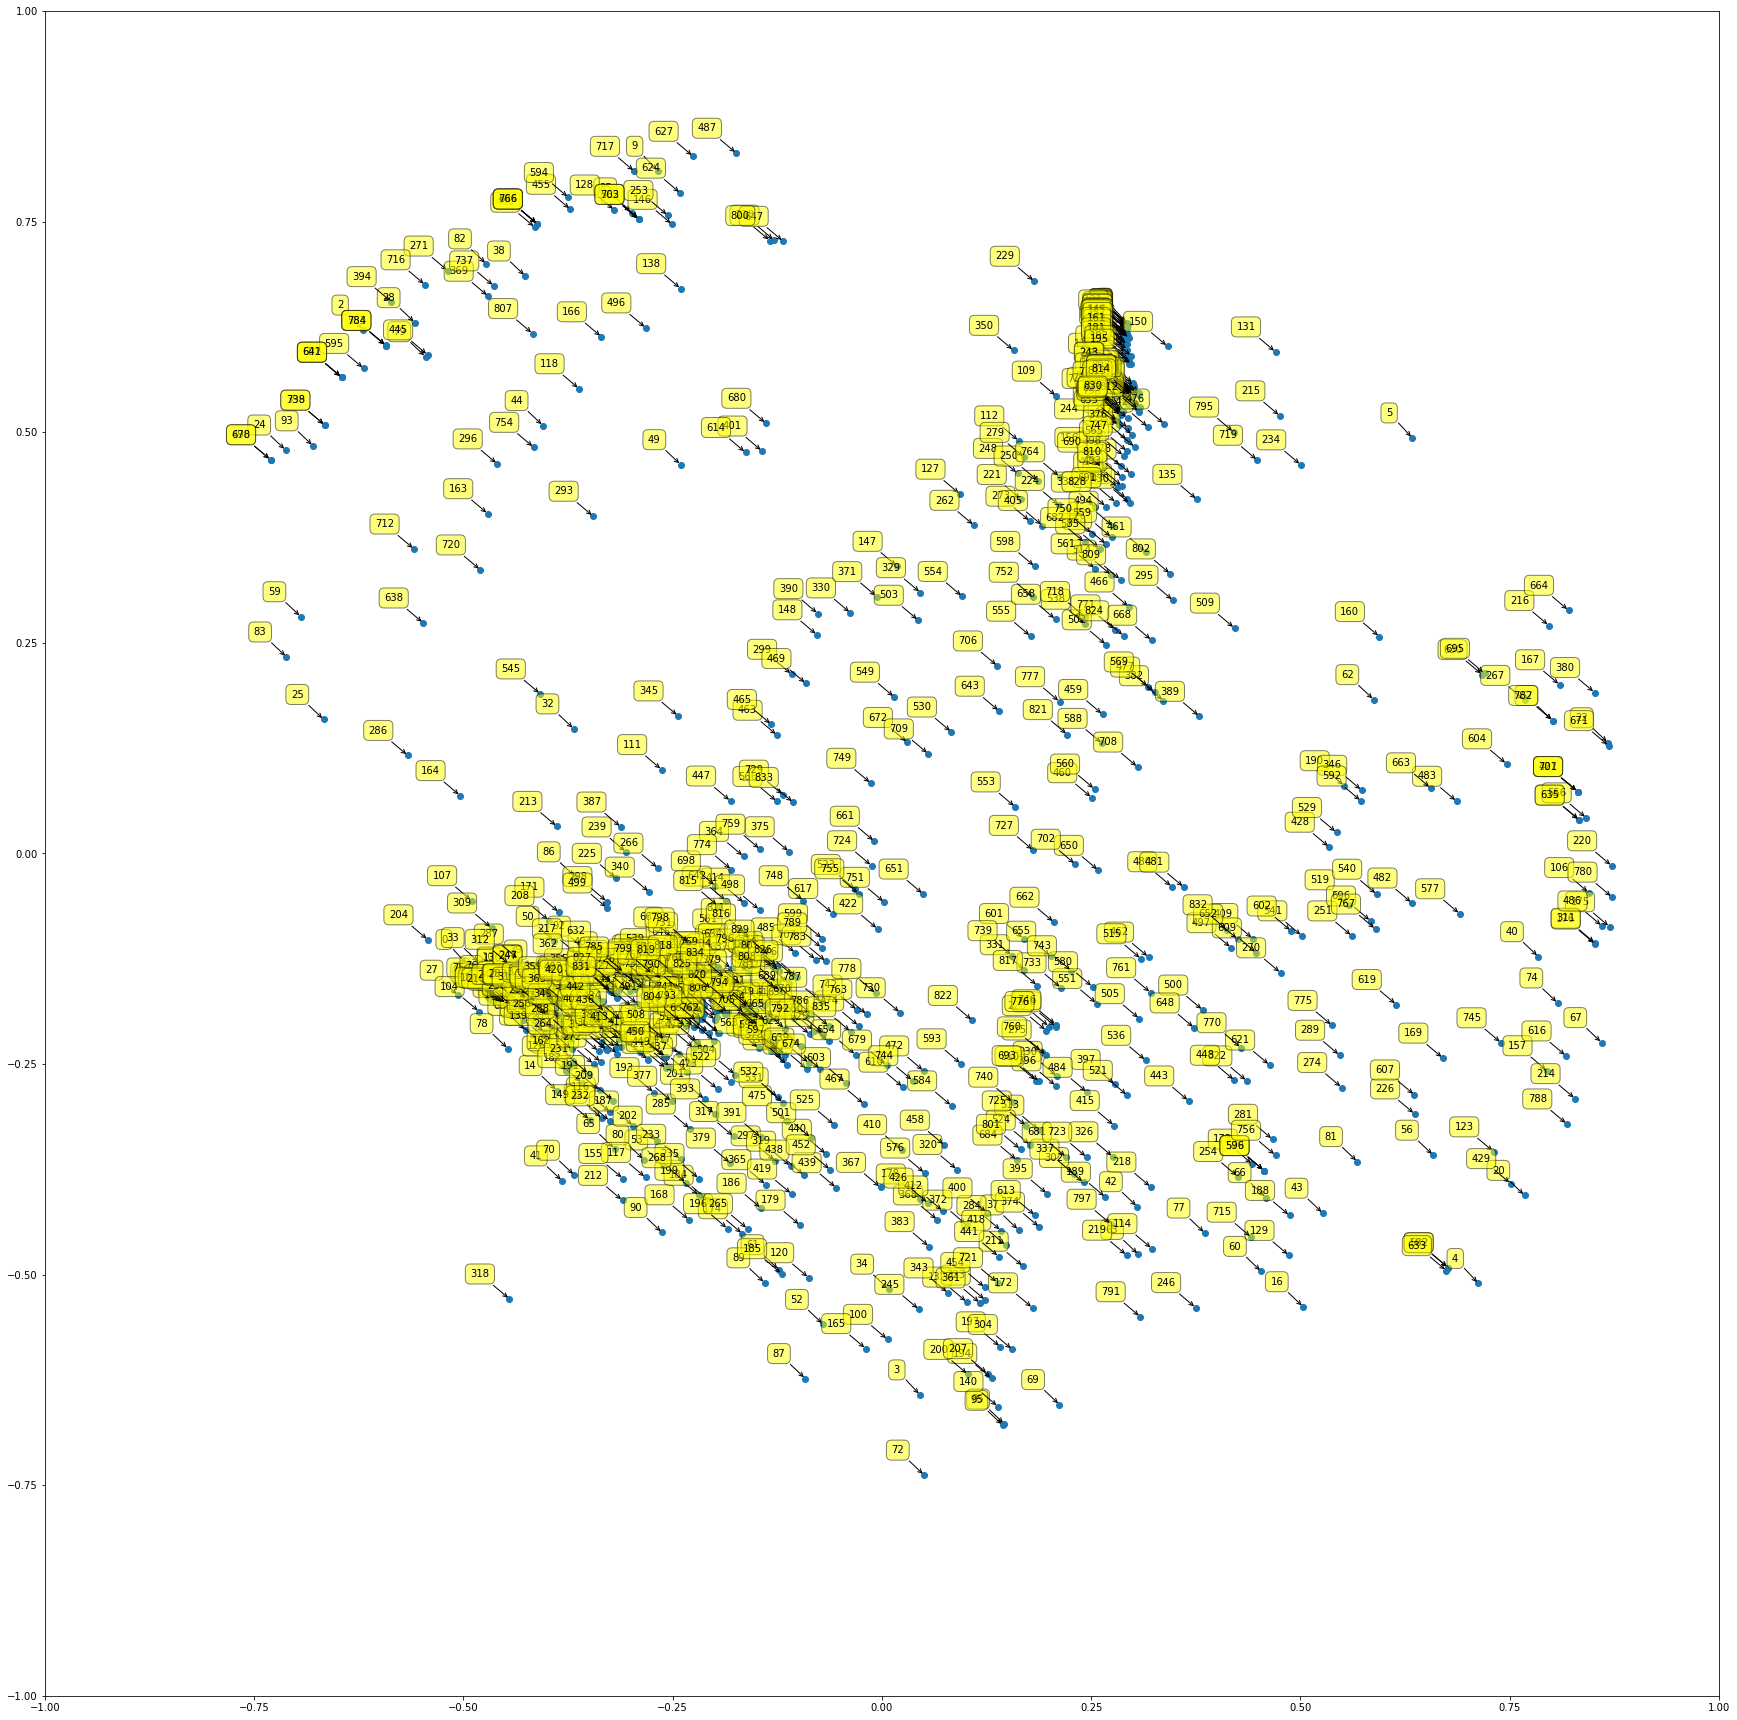

In [16]:
# Loaded Data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(3).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(3).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_40-20-0001(3).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

100.0


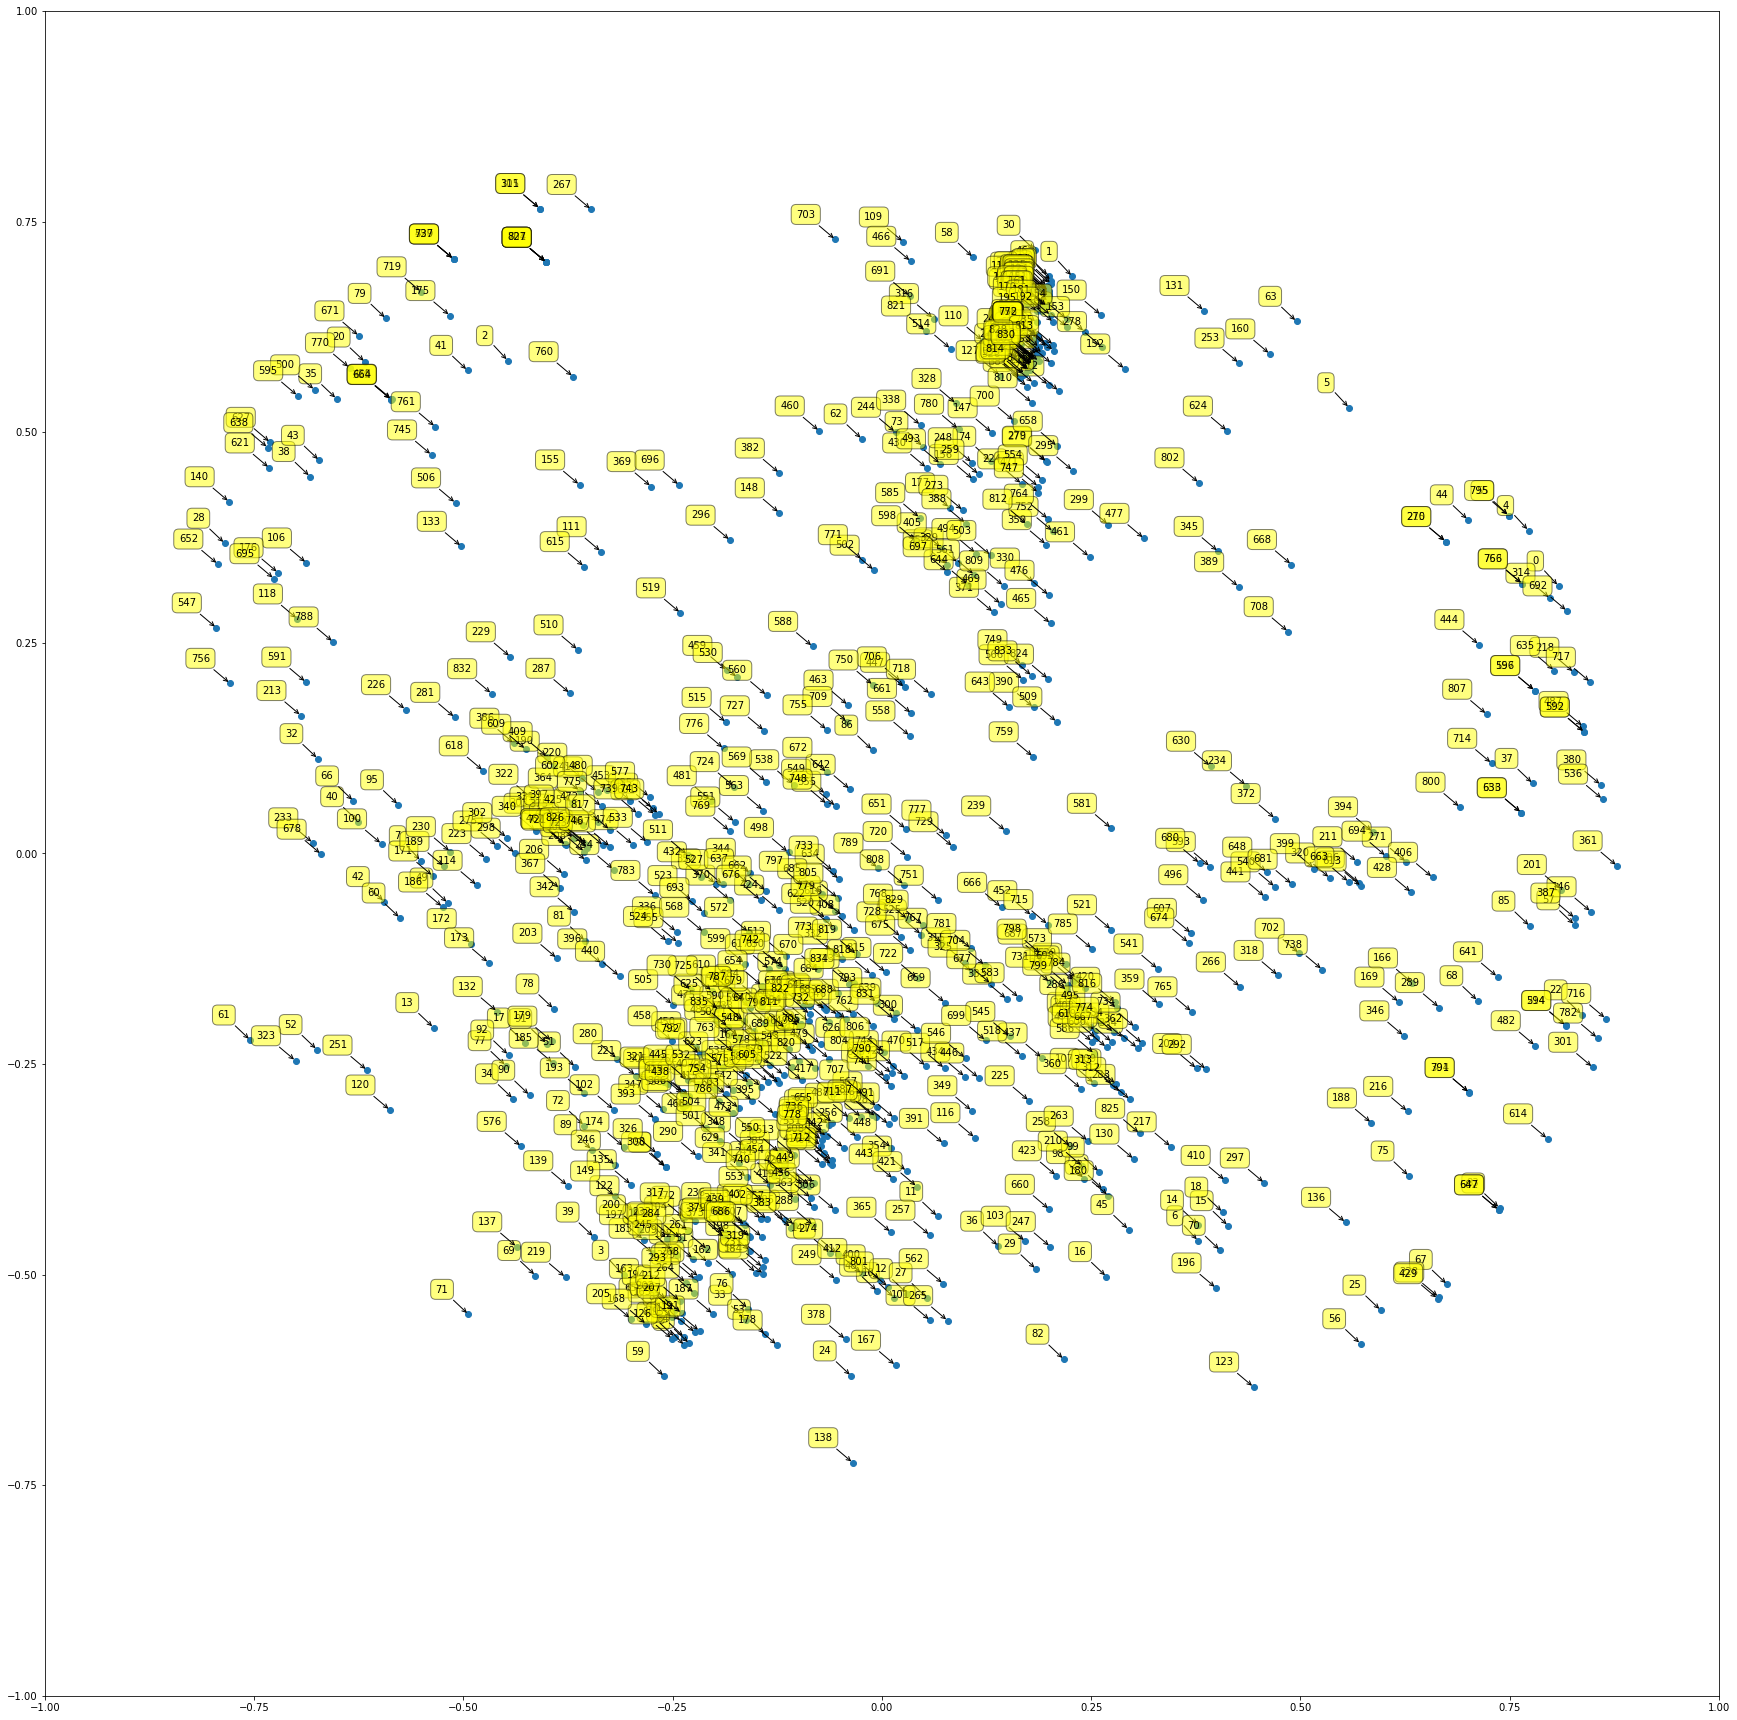

In [7]:
# Loaded Data
# dictionary = corpora.Dictionary.load('TRTWORLD_Followers_5-7(2).dict')
# corpus = corpora.MmCorpus('TRTWORLD_Followers_5-7(2).mm')
# lda = models.LdaModel.load("TRTWORLD_Followers_5-7_40-20-0001(2).lda")

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
print(amax)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [33]:
print(lda.get_document_topics(bow = corpus[366]))
print(lda.get_document_topics(bow = corpus[277]))

[(8, 0.028030439734546036), (9, 0.97193406780760183)]
[(8, 0.08998708493695444), (9, 0.90998629546291876)]


In [60]:
#A = np.array([[0, 1.3, 0.4, 0.7],
#               [1.3, 0, 0.9, 0.2],
#               [0.4, 0.9, 0, 1.1],
#               [0.7, 0.2, 1.1, 0]
#               ])*10

A = distanceMatrix

A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red", style="filled")
G.edge_attr.update(color="blue", width="2.0")

G.draw('distances.png', format='png', prog='neato')

In [ ]:
# Another Comparision Method

dense1 = matutils.sparse2full(lda[corpus[557]], lda.num_topics)
dense2 = matutils.sparse2full(lda[corpus[97]], lda.num_topics)
sim = np.sqrt(0.5 * ((np.sqrt(dense1) - np.sqrt(dense2))**2).sum())
print(sim)

dense1 = matutils.sparse2full(lda[corpus[557]], lda.num_topics)
dense2 = matutils.sparse2full(lda[corpus[21]], lda.num_topics)
sim = np.sqrt(0.5 * ((np.sqrt(dense1) - np.sqrt(dense2))**2).sum())
print(sim)